##Load Libraries

In [ ]:
!pip install keras==2.13.1
!pip install keras_applications==1.0.8
!pip install tensorflow==2.14.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 2.13.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#Tensorflow
!pip install tensorflow_addons
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D, BatchNormalization, Input, Dense, Flatten, Reshape, Conv1D, Conv1DTranspose, BatchNormalization, Cropping1D
from keras import metrics
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import RMSprop, Adam, Nadam
import keras

#Sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix

#Other
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snNew
import sklearn
import json
import seaborn as snNew
import numpy as np
import pandas as pd
from google.colab import drive
import pandas as pd
import numpy as np
import numpy as np
from imblearn.over_sampling import RandomOverSampler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.3.1 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
def one_hot_encoding(y, n_class):
  y_list = []

  for item in y:
    zer = np.zeros(n_class)
    zer[item] = 1
    y_list.append(zer)

  return np.array(y_list)

In [ ]:
#Loading Data
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


##CNN

In [ ]:
def CNN(X_train, y_train, X_test, y_test, name):
  print(name)

  input_tensor = Input(shape=(X_train.shape[1], 1))

  x = layers.Conv1D(16, 12, 10, activation='LeakyReLU')(input_tensor)
  x = layers.MaxPooling1D(pool_size = 2, strides = 2, padding = 'same')(x)
  x = layers.BatchNormalization(momentum=0.80, epsilon=0.001) (x)
  x = layers.Flatten()(x)
  x = Dense(512, activation='relu')(x)
  out = Dense(2, activation='softmax')(x)
  name = keras.Model(inputs=[input_tensor], outputs=[out])
  opt = Adam(learning_rate=1E-4, use_ema=True, ema_momentum=0.99)

  name.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)


  history = name.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, batch_size = 50,
                          callbacks=[es])

  print('CNN Classification Metrics: ', str(name))

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  y_pred = name.predict(X_test)
  confusion_matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), np.rint(y_pred.argmax(axis=1)))
  DetaFrame_cm = pd.DataFrame(confusion_matrix, range(2), range(2))
  snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['HC', 'OC'], xticklabels=['HC', 'OC'])
  plt.show()

  return (accuracy_score(y_test.argmax(axis=1), np.rint(y_pred.argmax(axis=1))))

LDA_80
Epoch 1/1000
6/6 [==============================] - 1s 53ms/step - loss: 0.7144 - accuracy: 0.4580 - val_loss: 0.6925 - val_accuracy: 0.4732
Epoch 2/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.6992 - accuracy: 0.5191 - val_loss: 0.6900 - val_accuracy: 0.6071
Epoch 3/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6872 - accuracy: 0.5573 - val_loss: 0.6866 - val_accuracy: 0.6339
Epoch 4/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6831 - accuracy: 0.5649 - val_loss: 0.6819 - val_accuracy: 0.6161
Epoch 5/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6775 - accuracy: 0.5992 - val_loss: 0.6768 - val_accuracy: 0.6161
Epoch 6/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6726 - accuracy: 0.6031 - val_loss: 0.6682 - val_accuracy: 0.6607
Epoch 7/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6699 - accuracy: 0.5878 - val_loss: 0.6648 - val_accuracy: 0.6607
Epoch 8/10

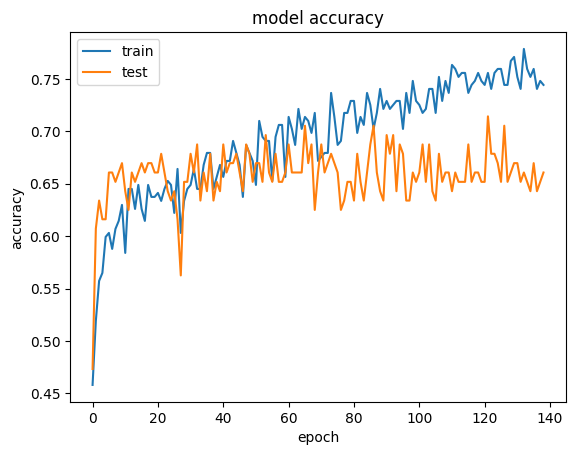

4/4 [==============================] - 0s 4ms/step


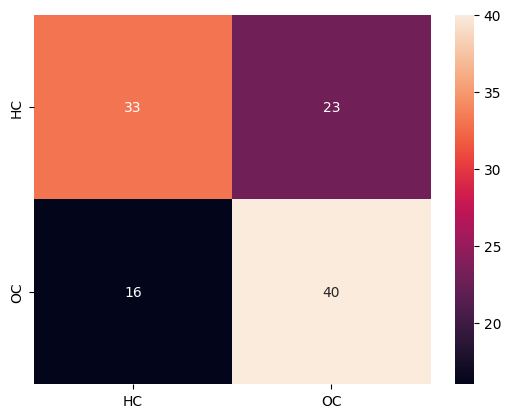

0.6517857142857143
LDA_85
Epoch 1/1000
6/6 [==============================] - 1s 44ms/step - loss: 0.7003 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.6161
Epoch 2/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6843 - accuracy: 0.5916 - val_loss: 0.6907 - val_accuracy: 0.5714
Epoch 3/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6822 - accuracy: 0.5496 - val_loss: 0.6881 - val_accuracy: 0.6250
Epoch 4/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6796 - accuracy: 0.5649 - val_loss: 0.6839 - val_accuracy: 0.6607
Epoch 5/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6747 - accuracy: 0.5916 - val_loss: 0.6785 - val_accuracy: 0.6518
Epoch 6/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6710 - accuracy: 0.6450 - val_loss: 0.6737 - val_accuracy: 0.6607
Epoch 7/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6679 - accuracy: 0.6374 - val_loss: 0.6711 - val_accuracy

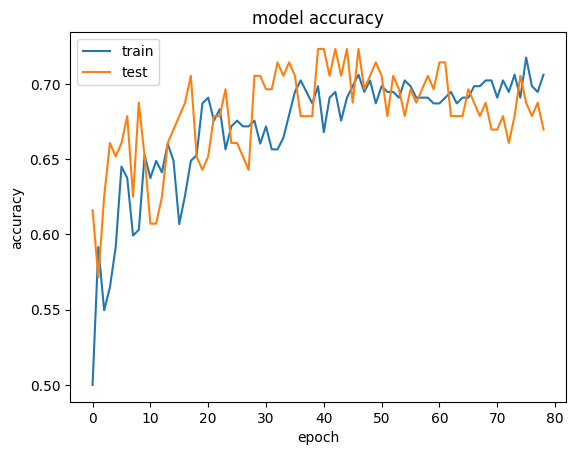

4/4 [==============================] - 0s 4ms/step


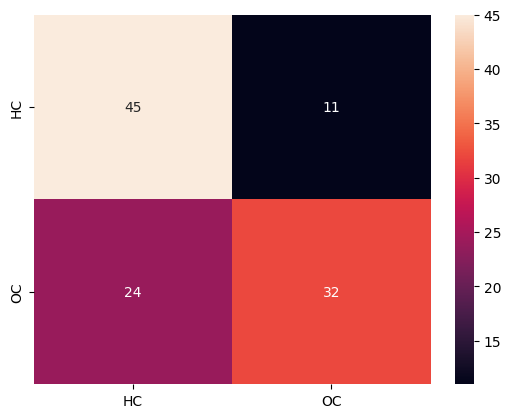

0.6875
LDA_90
Epoch 1/1000
6/6 [==============================] - 1s 42ms/step - loss: 0.6932 - accuracy: 0.5115 - val_loss: 0.6931 - val_accuracy: 0.4375
Epoch 2/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.6846 - accuracy: 0.6145 - val_loss: 0.6923 - val_accuracy: 0.5089
Epoch 3/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6788 - accuracy: 0.6260 - val_loss: 0.6904 - val_accuracy: 0.5625
Epoch 4/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6746 - accuracy: 0.6527 - val_loss: 0.6870 - val_accuracy: 0.6071
Epoch 5/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6709 - accuracy: 0.6374 - val_loss: 0.6821 - val_accuracy: 0.6429
Epoch 6/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.6676 - accuracy: 0.6298 - val_loss: 0.6773 - val_accuracy: 0.6429
Epoch 7/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6631 - accuracy: 0.6336 - val_loss: 0.6744 - val_accuracy: 0.6429
E

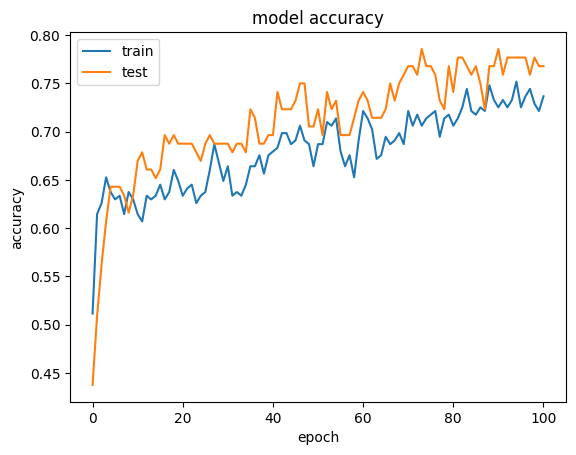

4/4 [==============================] - 0s 4ms/step


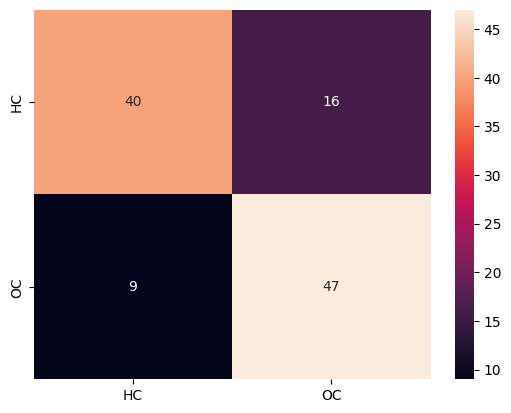

0.7767857142857143
LDA_95
Epoch 1/1000
6/6 [==============================] - 1s 39ms/step - loss: 0.6974 - accuracy: 0.4924 - val_loss: 0.6935 - val_accuracy: 0.4375
Epoch 2/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6953 - accuracy: 0.4962 - val_loss: 0.6933 - val_accuracy: 0.5179
Epoch 3/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.5038 - val_loss: 0.6930 - val_accuracy: 0.5357
Epoch 4/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6913 - accuracy: 0.5038 - val_loss: 0.6921 - val_accuracy: 0.5893
Epoch 5/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6900 - accuracy: 0.5153 - val_loss: 0.6905 - val_accuracy: 0.5982
Epoch 6/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.6889 - accuracy: 0.5458 - val_loss: 0.6881 - val_accuracy: 0.5804
Epoch 7/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.6872 - accuracy: 0.5802 - val_loss: 0.6860 - val_accuracy:

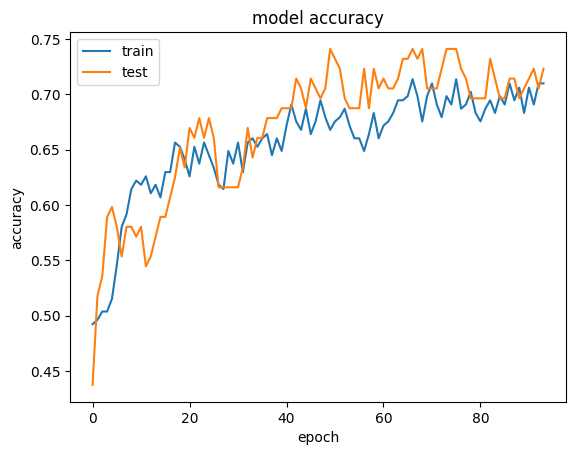

4/4 [==============================] - 0s 3ms/step


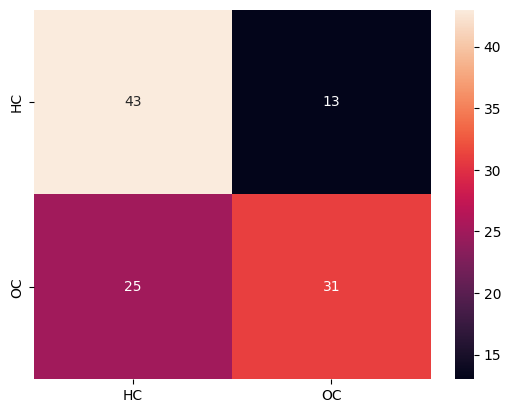

0.6607142857142857
LDA_99
Epoch 1/1000
6/6 [==============================] - 1s 43ms/step - loss: 0.6921 - accuracy: 0.5115 - val_loss: 0.6927 - val_accuracy: 0.5625
Epoch 2/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6914 - accuracy: 0.5305 - val_loss: 0.6922 - val_accuracy: 0.5893
Epoch 3/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6910 - accuracy: 0.5534 - val_loss: 0.6912 - val_accuracy: 0.6071
Epoch 4/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6903 - accuracy: 0.5573 - val_loss: 0.6897 - val_accuracy: 0.6071
Epoch 5/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6900 - accuracy: 0.5496 - val_loss: 0.6876 - val_accuracy: 0.6161
Epoch 6/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6897 - accuracy: 0.5573 - val_loss: 0.6858 - val_accuracy: 0.6071
Epoch 7/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.6889 - accuracy: 0.5687 - val_loss: 0.6843 - val_accur

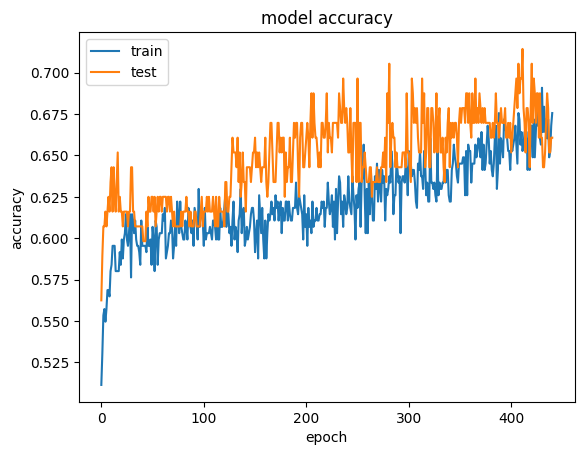

4/4 [==============================] - 0s 4ms/step


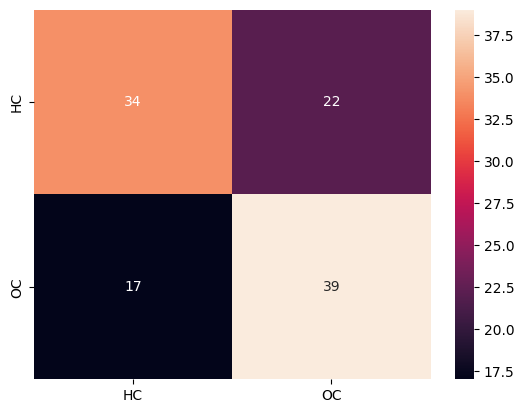

0.6517857142857143
RF_80
Epoch 1/1000
6/6 [==============================] - 1s 43ms/step - loss: 0.8062 - accuracy: 0.5076 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 2/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.7128 - accuracy: 0.4580 - val_loss: 0.6990 - val_accuracy: 0.3571
Epoch 3/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.7061 - accuracy: 0.4733 - val_loss: 0.6959 - val_accuracy: 0.5089
Epoch 4/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.6877 - accuracy: 0.5954 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 5/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.6866 - accuracy: 0.5687 - val_loss: 0.6764 - val_accuracy: 0.5000
Epoch 6/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6778 - accuracy: 0.6183 - val_loss: 0.6584 - val_accuracy: 0.7054
Epoch 7/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6756 - accuracy: 0.6298 - val_loss: 0.6504 - val_accur

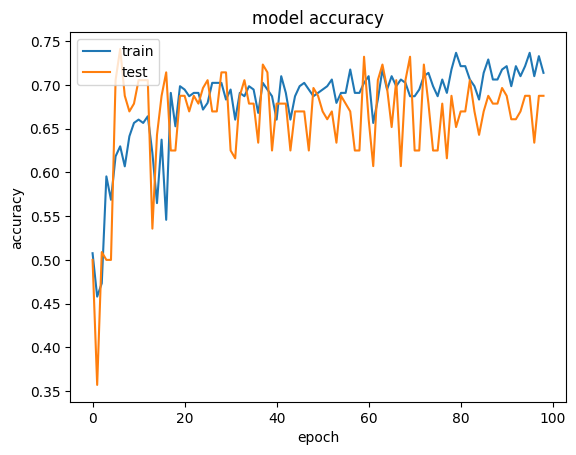

4/4 [==============================] - 0s 3ms/step


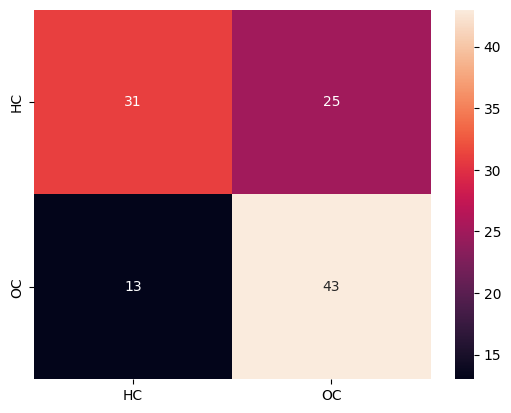

0.6607142857142857
RF_85
Epoch 1/1000
6/6 [==============================] - 2s 69ms/step - loss: 0.7428 - accuracy: 0.4924 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.6948 - accuracy: 0.5305 - val_loss: 0.6897 - val_accuracy: 0.5714
Epoch 3/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.7114 - accuracy: 0.5076 - val_loss: 0.6853 - val_accuracy: 0.4911
Epoch 4/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.6903 - accuracy: 0.5344 - val_loss: 0.6797 - val_accuracy: 0.5804
Epoch 5/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.6847 - accuracy: 0.5840 - val_loss: 0.6731 - val_accuracy: 0.5357
Epoch 6/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.6846 - accuracy: 0.5458 - val_loss: 0.6578 - val_accuracy: 0.6875
Epoch 7/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.6797 - accuracy: 0.5954 - val_loss: 0.6558 - val_accur

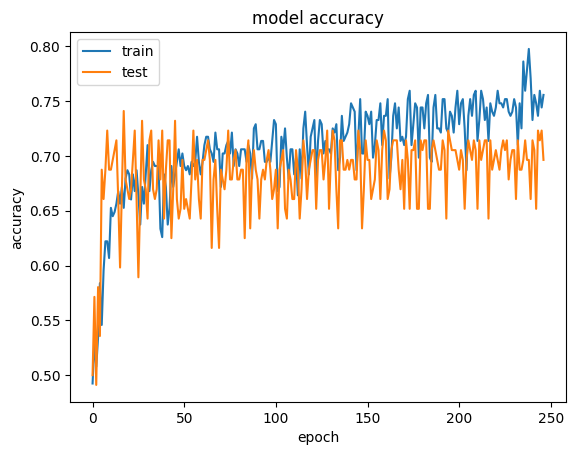

4/4 [==============================] - 0s 3ms/step


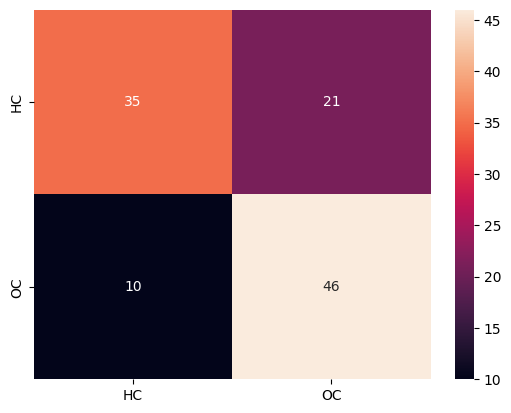

0.7232142857142857
RF_90
Epoch 1/1000
6/6 [==============================] - 1s 45ms/step - loss: 0.8603 - accuracy: 0.5076 - val_loss: 0.7025 - val_accuracy: 0.5000
Epoch 2/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.7508 - accuracy: 0.4733 - val_loss: 0.7074 - val_accuracy: 0.5000
Epoch 3/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.7197 - accuracy: 0.4695 - val_loss: 0.7116 - val_accuracy: 0.5000
Epoch 4/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.7145 - accuracy: 0.4542 - val_loss: 0.7141 - val_accuracy: 0.4018
Epoch 5/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.7067 - accuracy: 0.4389 - val_loss: 0.7089 - val_accuracy: 0.3661
Epoch 6/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.6975 - accuracy: 0.4580 - val_loss: 0.6982 - val_accuracy: 0.5000
Epoch 7/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6910 - accuracy: 0.5420 - val_loss: 0.6926 - val_accura

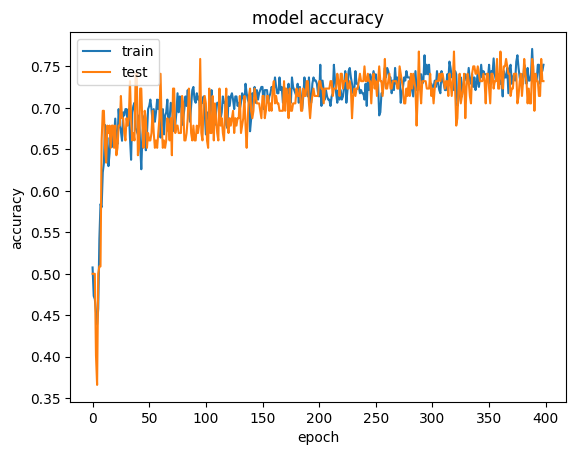

4/4 [==============================] - 0s 3ms/step


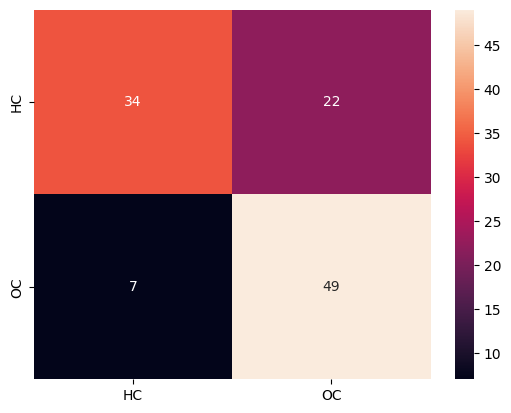

0.7410714285714286
RF_95
Epoch 1/1000
6/6 [==============================] - 1s 49ms/step - loss: 0.7007 - accuracy: 0.4962 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 2/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.6894 - accuracy: 0.5992 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 3/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.6831 - accuracy: 0.5573 - val_loss: 0.6877 - val_accuracy: 0.4911
Epoch 4/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.6793 - accuracy: 0.5916 - val_loss: 0.6775 - val_accuracy: 0.5179
Epoch 5/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.6745 - accuracy: 0.6298 - val_loss: 0.6656 - val_accuracy: 0.5982
Epoch 6/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6727 - accuracy: 0.6221 - val_loss: 0.6566 - val_accuracy: 0.6071
Epoch 7/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.6694 - accuracy: 0.6489 - val_loss: 0.6510 - val_accura

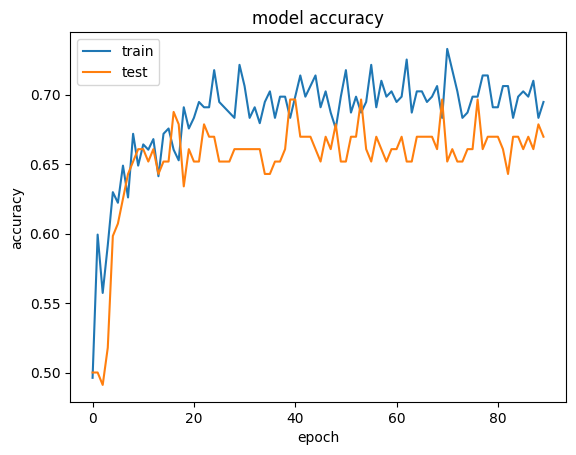

4/4 [==============================] - 0s 3ms/step


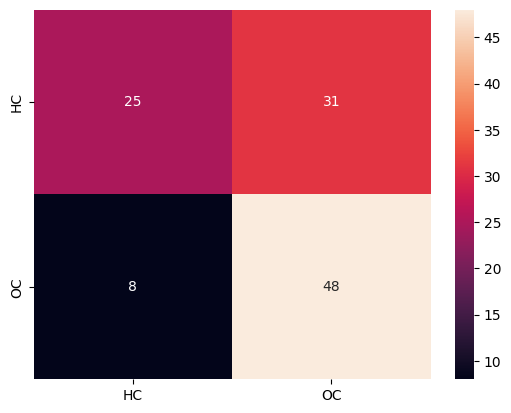

0.6517857142857143
RF_99
Epoch 1/1000
6/6 [==============================] - 1s 44ms/step - loss: 0.6896 - accuracy: 0.5611 - val_loss: 0.6914 - val_accuracy: 0.6339
Epoch 2/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6853 - accuracy: 0.6145 - val_loss: 0.6891 - val_accuracy: 0.6607
Epoch 3/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.6815 - accuracy: 0.6183 - val_loss: 0.6864 - val_accuracy: 0.6339
Epoch 4/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6791 - accuracy: 0.5840 - val_loss: 0.6813 - val_accuracy: 0.6518
Epoch 5/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.6752 - accuracy: 0.5878 - val_loss: 0.6763 - val_accuracy: 0.6339
Epoch 6/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6731 - accuracy: 0.6031 - val_loss: 0.6710 - val_accuracy: 0.6339
Epoch 7/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.6710 - accuracy: 0.6183 - val_loss: 0.6660 - val_accurac

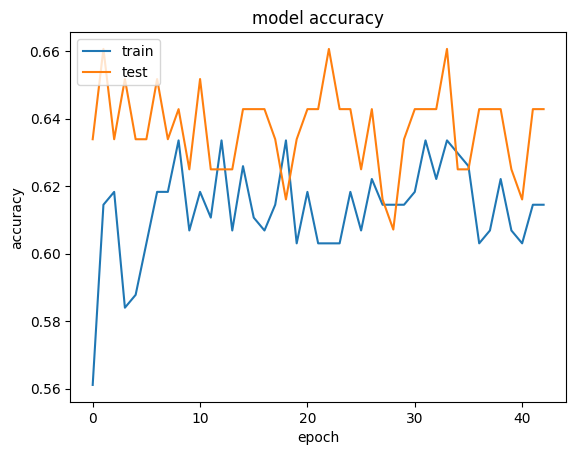

4/4 [==============================] - 0s 3ms/step


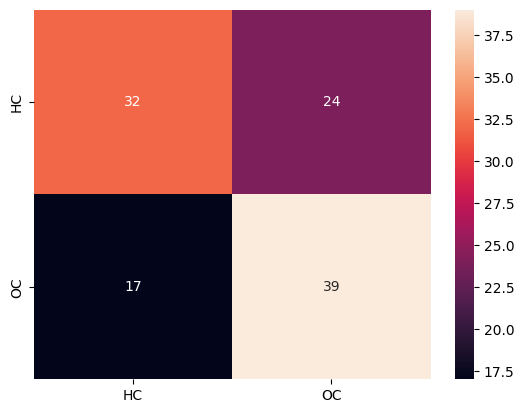

0.6339285714285714
Transformer_80
Epoch 1/1000
6/6 [==============================] - 1s 50ms/step - loss: 0.7487 - accuracy: 0.4695 - val_loss: 0.6948 - val_accuracy: 0.4286
Epoch 2/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.6936 - accuracy: 0.4733 - val_loss: 0.6944 - val_accuracy: 0.4821
Epoch 3/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.6722 - accuracy: 0.5573 - val_loss: 0.6883 - val_accuracy: 0.5714
Epoch 4/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.6632 - accuracy: 0.6260 - val_loss: 0.6782 - val_accuracy: 0.6071
Epoch 5/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.6519 - accuracy: 0.6260 - val_loss: 0.6706 - val_accuracy: 0.6250
Epoch 6/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.6386 - accuracy: 0.6374 - val_loss: 0.6665 - val_accuracy: 0.6339
Epoch 7/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.6315 - accuracy: 0.6298 - val_loss: 0.6655 - 

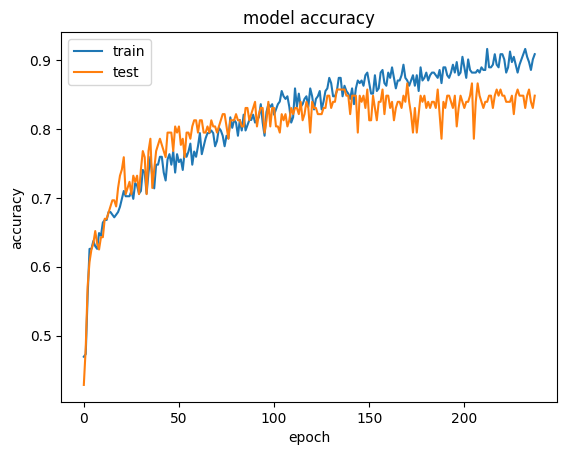

4/4 [==============================] - 0s 3ms/step


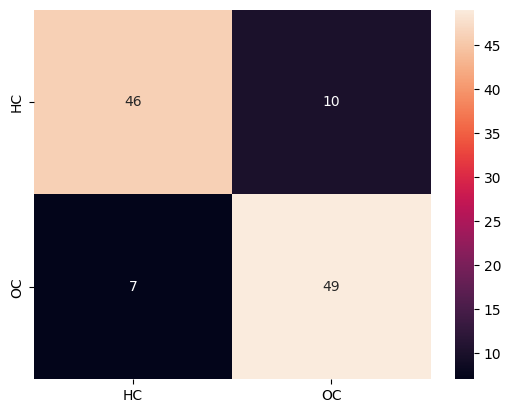

0.8482142857142857
Transformer_85
Epoch 1/1000
6/6 [==============================] - 1s 45ms/step - loss: 0.7010 - accuracy: 0.4504 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.6822 - accuracy: 0.5763 - val_loss: 0.6924 - val_accuracy: 0.5179
Epoch 3/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.6683 - accuracy: 0.6183 - val_loss: 0.6896 - val_accuracy: 0.5804
Epoch 4/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.6568 - accuracy: 0.6527 - val_loss: 0.6848 - val_accuracy: 0.5714
Epoch 5/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.6474 - accuracy: 0.6412 - val_loss: 0.6797 - val_accuracy: 0.5714
Epoch 6/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.6395 - accuracy: 0.6603 - val_loss: 0.6764 - val_accuracy: 0.5804
Epoch 7/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.6348 - accuracy: 0.6489 - val_loss: 0.6732 - 

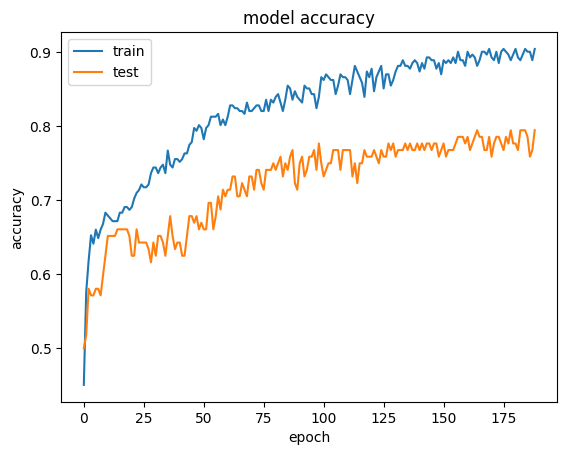

4/4 [==============================] - 0s 3ms/step


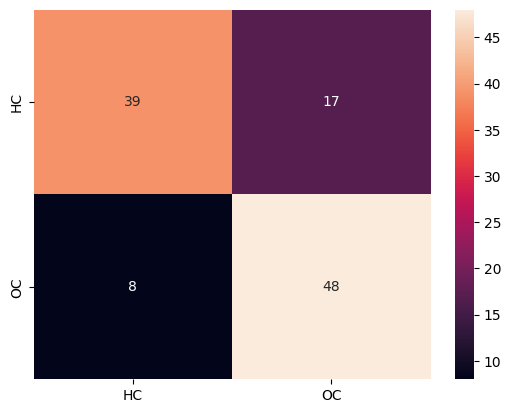

0.7767857142857143
Transformer_90
Epoch 1/1000
6/6 [==============================] - 2s 71ms/step - loss: 0.6897 - accuracy: 0.5420 - val_loss: 0.6927 - val_accuracy: 0.4821
Epoch 2/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.6809 - accuracy: 0.5420 - val_loss: 0.6925 - val_accuracy: 0.5089
Epoch 3/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.6759 - accuracy: 0.5458 - val_loss: 0.6914 - val_accuracy: 0.5179
Epoch 4/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.6720 - accuracy: 0.5725 - val_loss: 0.6908 - val_accuracy: 0.5536
Epoch 5/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.6685 - accuracy: 0.5840 - val_loss: 0.6908 - val_accuracy: 0.5714
Epoch 6/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.6651 - accuracy: 0.5954 - val_loss: 0.6904 - val_accuracy: 0.5804
Epoch 7/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.6619 - accuracy: 0.5916 - val_loss: 0.6899 - 

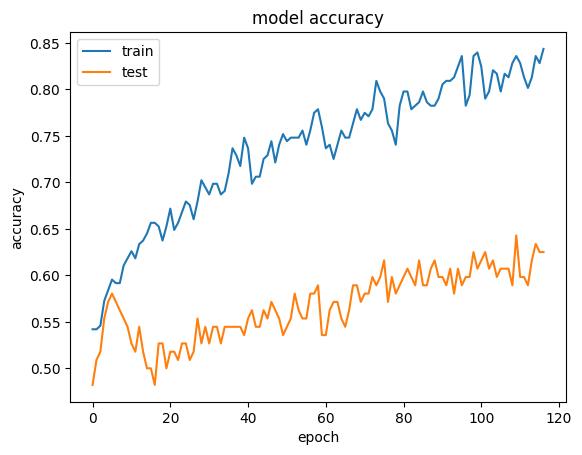

4/4 [==============================] - 0s 3ms/step


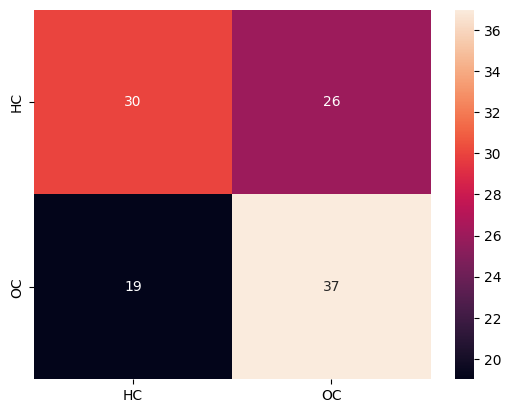

0.5982142857142857
Transformer_95
Epoch 1/1000
6/6 [==============================] - 1s 59ms/step - loss: 0.7009 - accuracy: 0.4618 - val_loss: 0.6931 - val_accuracy: 0.5714
Epoch 2/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.6960 - accuracy: 0.4771 - val_loss: 0.6920 - val_accuracy: 0.5446
Epoch 3/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6902 - val_accuracy: 0.5446
Epoch 4/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.6898 - accuracy: 0.5115 - val_loss: 0.6868 - val_accuracy: 0.5625
Epoch 5/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.6865 - accuracy: 0.5305 - val_loss: 0.6827 - val_accuracy: 0.5982
Epoch 6/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.6837 - accuracy: 0.5573 - val_loss: 0.6799 - val_accuracy: 0.5804
Epoch 7/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.6829 - accuracy: 0.5878 - val_loss: 0.6785 - 

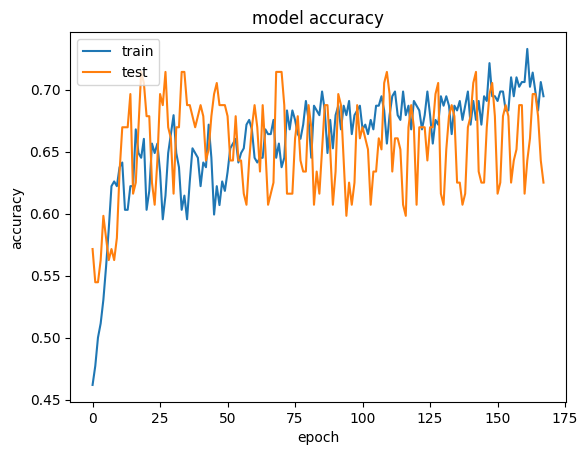

4/4 [==============================] - 0s 3ms/step


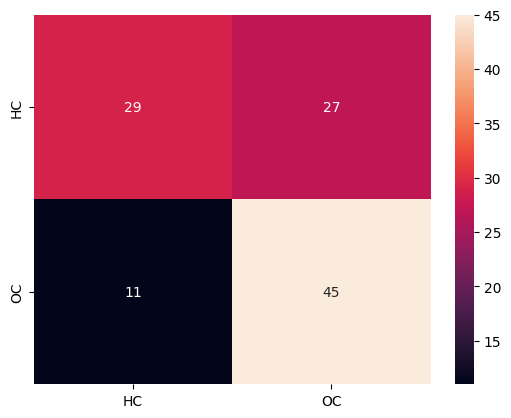

0.6607142857142857
Transformer_99
Epoch 1/1000
6/6 [==============================] - 1s 67ms/step - loss: 0.6907 - accuracy: 0.5382 - val_loss: 0.6930 - val_accuracy: 0.5089
Epoch 2/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.6888 - accuracy: 0.5382 - val_loss: 0.6929 - val_accuracy: 0.5268
Epoch 3/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.6882 - accuracy: 0.5420 - val_loss: 0.6927 - val_accuracy: 0.5268
Epoch 4/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.6872 - accuracy: 0.5496 - val_loss: 0.6926 - val_accuracy: 0.5179
Epoch 5/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.6860 - accuracy: 0.5458 - val_loss: 0.6925 - val_accuracy: 0.5089
Epoch 6/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.6860 - accuracy: 0.5458 - val_loss: 0.6925 - val_accuracy: 0.5179
Epoch 7/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.6847 - accuracy: 0.5496 - val_loss: 0.6927 - 

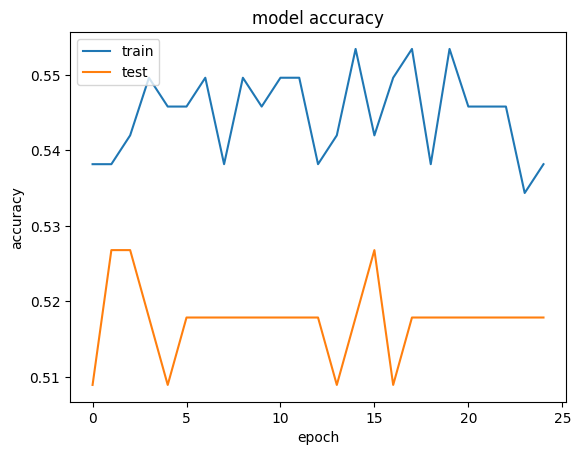

4/4 [==============================] - 0s 4ms/step


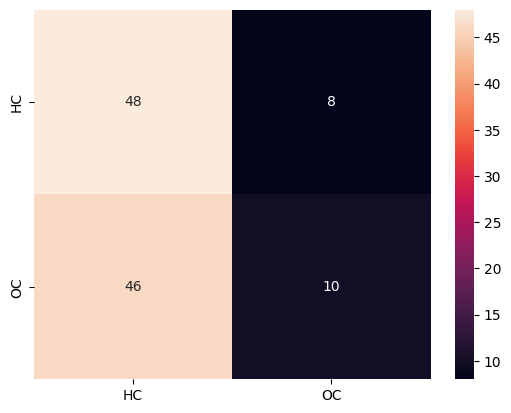

0.5178571428571429
CNN_80
Epoch 1/1000
6/6 [==============================] - 1s 44ms/step - loss: 0.6563 - accuracy: 0.6069 - val_loss: 0.6854 - val_accuracy: 0.5893
Epoch 2/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.6346 - accuracy: 0.6603 - val_loss: 0.6744 - val_accuracy: 0.6161
Epoch 3/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.6182 - accuracy: 0.6679 - val_loss: 0.6544 - val_accuracy: 0.6429
Epoch 4/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.6099 - accuracy: 0.6718 - val_loss: 0.6280 - val_accuracy: 0.6964
Epoch 5/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.6019 - accuracy: 0.6832 - val_loss: 0.6039 - val_accuracy: 0.7232
Epoch 6/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.5948 - accuracy: 0.6756 - val_loss: 0.5916 - val_accuracy: 0.7411
Epoch 7/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.5892 - accuracy: 0.6947 - val_loss: 0.5895 - val_accu

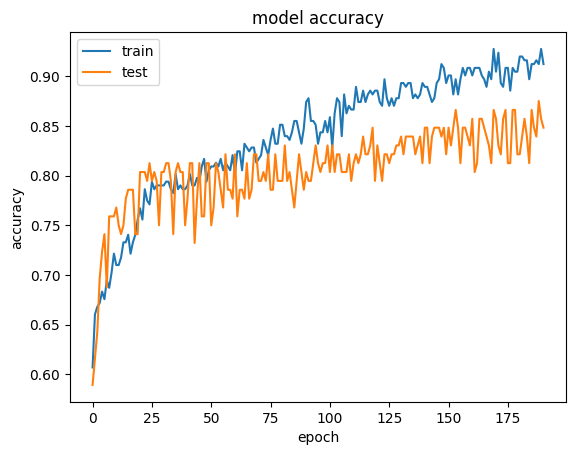

4/4 [==============================] - 0s 3ms/step


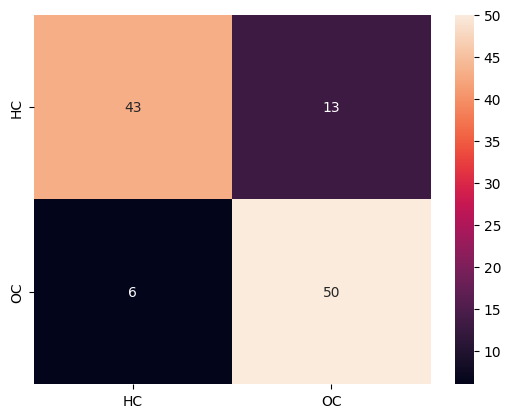

0.8303571428571429
CNN_85
Epoch 1/1000
6/6 [==============================] - 1s 46ms/step - loss: 0.7228 - accuracy: 0.3931 - val_loss: 0.6938 - val_accuracy: 0.4375
Epoch 2/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.6945 - accuracy: 0.4885 - val_loss: 0.6902 - val_accuracy: 0.5714
Epoch 3/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6720 - accuracy: 0.5725 - val_loss: 0.6818 - val_accuracy: 0.5536
Epoch 4/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.6577 - accuracy: 0.5954 - val_loss: 0.6640 - val_accuracy: 0.5893
Epoch 5/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.6422 - accuracy: 0.6221 - val_loss: 0.6392 - val_accuracy: 0.7411
Epoch 6/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.6295 - accuracy: 0.6832 - val_loss: 0.6176 - val_accuracy: 0.8214
Epoch 7/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.6194 - accuracy: 0.6908 - val_loss: 0.6006 - val_accu

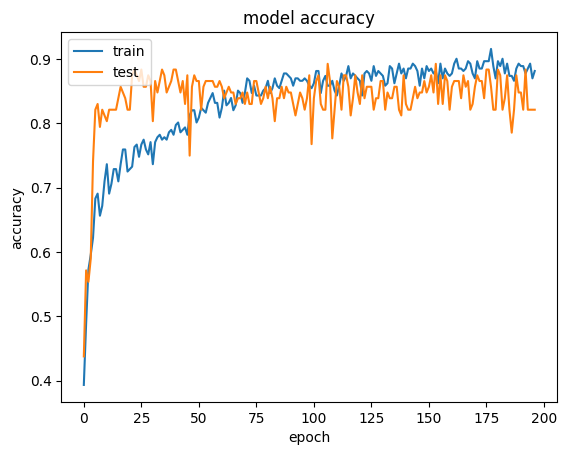

4/4 [==============================] - 0s 3ms/step


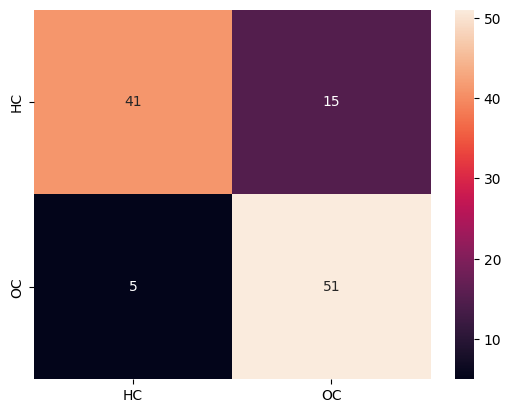

0.8214285714285714
CNN_90
Epoch 1/1000
6/6 [==============================] - 1s 45ms/step - loss: 0.7259 - accuracy: 0.5725 - val_loss: 0.6861 - val_accuracy: 0.6518
Epoch 2/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.6782 - accuracy: 0.5802 - val_loss: 0.6787 - val_accuracy: 0.6339
Epoch 3/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.6524 - accuracy: 0.6183 - val_loss: 0.6648 - val_accuracy: 0.6518
Epoch 4/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6377 - accuracy: 0.6298 - val_loss: 0.6436 - val_accuracy: 0.7411
Epoch 5/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.6289 - accuracy: 0.6298 - val_loss: 0.6225 - val_accuracy: 0.7679
Epoch 6/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6196 - accuracy: 0.6603 - val_loss: 0.6108 - val_accuracy: 0.7589
Epoch 7/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.6131 - accuracy: 0.6565 - val_loss: 0.6020 - val_accu

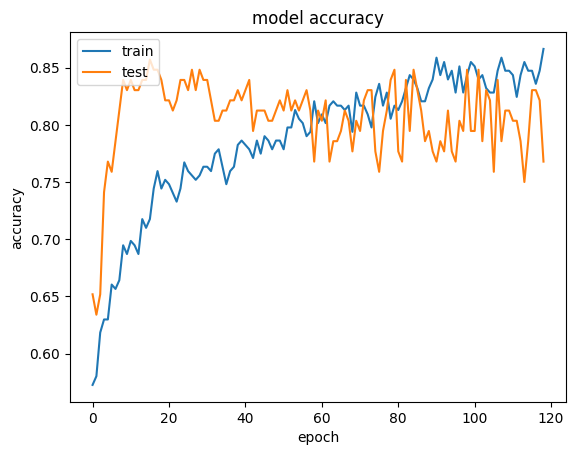

4/4 [==============================] - 0s 4ms/step


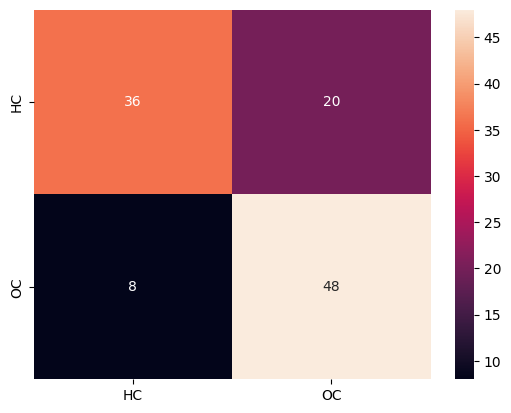

0.75
CNN_95
Epoch 1/1000
6/6 [==============================] - 1s 45ms/step - loss: 0.7050 - accuracy: 0.4733 - val_loss: 0.6929 - val_accuracy: 0.4464
Epoch 2/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6848 - accuracy: 0.4847 - val_loss: 0.6877 - val_accuracy: 0.5804
Epoch 3/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.6690 - accuracy: 0.6145 - val_loss: 0.6772 - val_accuracy: 0.6339
Epoch 4/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.6564 - accuracy: 0.6336 - val_loss: 0.6607 - val_accuracy: 0.6250
Epoch 5/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.6464 - accuracy: 0.6412 - val_loss: 0.6424 - val_accuracy: 0.6429
Epoch 6/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.6391 - accuracy: 0.6527 - val_loss: 0.6286 - val_accuracy: 0.6607
Epoch 7/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.6339 - accuracy: 0.6527 - val_loss: 0.6210 - val_accuracy: 0.7411
E

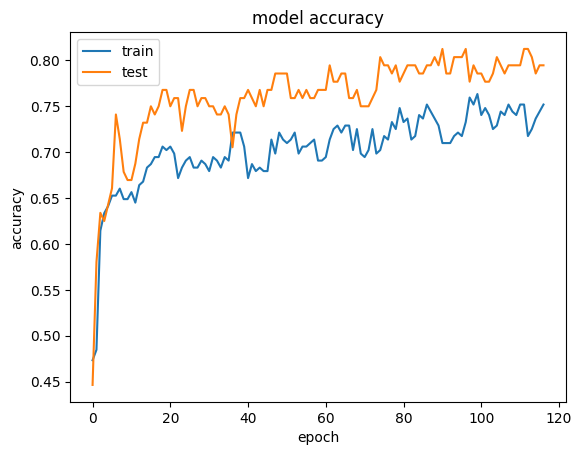

4/4 [==============================] - 0s 4ms/step


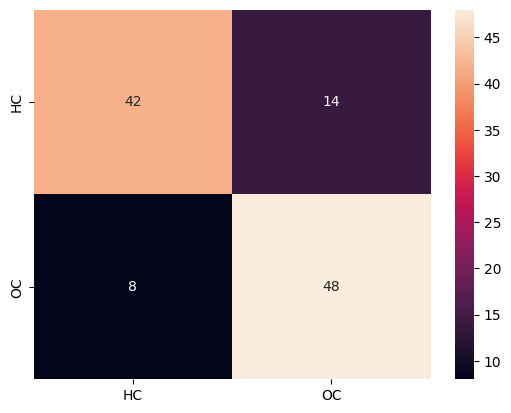

0.8035714285714286
CNN_99
Epoch 1/1000
6/6 [==============================] - 2s 41ms/step - loss: 0.6956 - accuracy: 0.4924 - val_loss: 0.6919 - val_accuracy: 0.5893
Epoch 2/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.6816 - accuracy: 0.5305 - val_loss: 0.6896 - val_accuracy: 0.5893
Epoch 3/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.6714 - accuracy: 0.6412 - val_loss: 0.6853 - val_accuracy: 0.5893
Epoch 4/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.6633 - accuracy: 0.6450 - val_loss: 0.6787 - val_accuracy: 0.5893
Epoch 5/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.6605 - accuracy: 0.6412 - val_loss: 0.6723 - val_accuracy: 0.5893
Epoch 6/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.6510 - accuracy: 0.6450 - val_loss: 0.6681 - val_accuracy: 0.5893
Epoch 7/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.6444 - accuracy: 0.6450 - val_loss: 0.6664 - val_accu

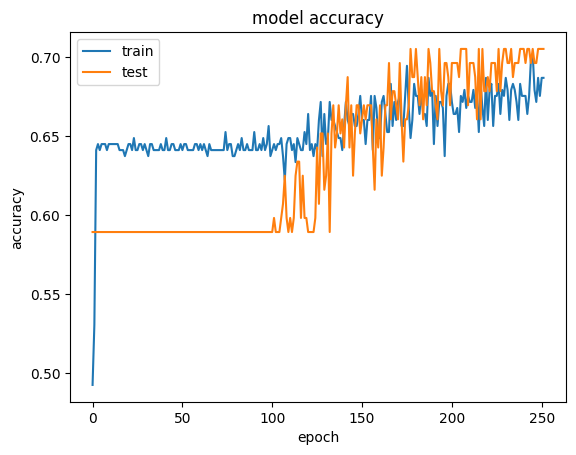

4/4 [==============================] - 0s 3ms/step


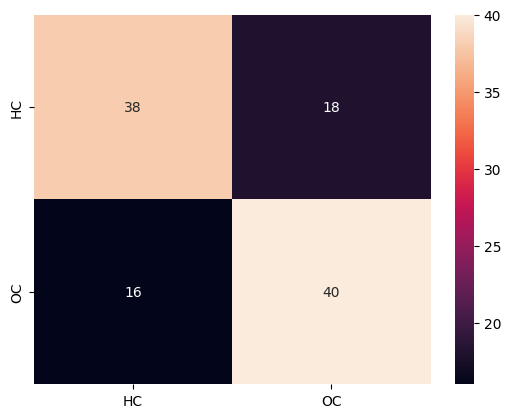

0.6964285714285714
{'LDA80': 0.6517857142857143, 'LDA85': 0.6875, 'LDA90': 0.7767857142857143, 'LDA95': 0.6607142857142857, 'LDA99': 0.6517857142857143, 'RF80': 0.6607142857142857, 'RF85': 0.7232142857142857, 'RF90': 0.7410714285714286, 'RF95': 0.6517857142857143, 'RF99': 0.6339285714285714, 'Transformer80': 0.8482142857142857, 'Transformer85': 0.7767857142857143, 'Transformer90': 0.5982142857142857, 'Transformer95': 0.6607142857142857, 'Transformer99': 0.5178571428571429, 'CNN80': 0.8303571428571429, 'CNN85': 0.8214285714285714, 'CNN90': 0.75, 'CNN95': 0.8035714285714286, 'CNN99': 0.6964285714285714}


In [ ]:
strictness = [80, 85, 90, 95, 99]
model = ['LDA', 'RF', 'Transformer', 'CNN']


fin_d = {}

for mod in model:
  for number in strictness:
    train_name = 'Training_' + mod + '_' + str(number) + '.csv'
    test_name = 'Testing_' + mod + '_' + str(number) + '.csv'
    train_load = '/content/drive/MyDrive/Ovarian_Cancer/' + train_name
    test_load = '/content/drive/MyDrive/Ovarian_Cancer/' + test_name
    train_df = pd.read_csv(train_load, index_col = 0)
    test_df = pd.read_csv(test_load, index_col = 0)

    X_train_ = train_df.drop('y', axis = 1)
    y_train_ = train_df['y']

    X_test_ = test_df.drop('y', axis = 1)
    y_test_ = test_df['y']

    le = preprocessing.LabelEncoder()
    y_train_ = le.fit_transform(y_train_)
    y_test_ = le.transform(y_test_)


    def one_hot_encoding(y, n_class):
      y_list = []

      for item in y:
        zer = np.zeros(n_class)
        zer[item] = 1
        y_list.append(zer)

      return np.array(y_list)

    y_train_ = one_hot_encoding(y_train_, 2)
    y_test_ = one_hot_encoding(y_test_, 2)

    f = CNN(X_train_, y_train_, X_test_, y_test_, train_name[9:-4])

    n = mod + str(number)
    fin_d[n] = f
    print(f)

print(fin_d)

In [ ]:
fin_d

{'LDA80': 0.6517857142857143,
 'LDA85': 0.6875,
 'LDA90': 0.7767857142857143,
 'LDA95': 0.6607142857142857,
 'LDA99': 0.6517857142857143,
 'RF80': 0.6607142857142857,
 'RF85': 0.7232142857142857,
 'RF90': 0.7410714285714286,
 'RF95': 0.6517857142857143,
 'RF99': 0.6339285714285714,
 'Transformer80': 0.8482142857142857,
 'Transformer85': 0.7767857142857143,
 'Transformer90': 0.5982142857142857,
 'Transformer95': 0.6607142857142857,
 'Transformer99': 0.5178571428571429,
 'CNN80': 0.8303571428571429,
 'CNN85': 0.8214285714285714,
 'CNN90': 0.75,
 'CNN95': 0.8035714285714286,
 'CNN99': 0.6964285714285714}

##Transformer

In [ ]:
class ViTEmbeddings(tf.keras.layers.Layer):
    def __init__(self, patch_size, hidden_size, dropout=0.0, **kwargs):
        super().__init__(**kwargs)

        self.patch_size = patch_size
        self.hidden_size = hidden_size

        self.patch_embeddings = tf.keras.layers.Conv1D(filters=hidden_size, kernel_size=patch_size, strides=patch_size)
        self.dropout = tf.keras.layers.Dropout(rate=dropout)

    def build(self, input_shape):
        self.cls_token = self.add_weight(shape=(1, 1, self.hidden_size), trainable=True, name="cls_token")

        num_patches = input_shape[1] // self.patch_size
        self.position_embeddings = self.add_weight(
            shape=(1, num_patches + 1, self.hidden_size), trainable=True, name="position_embeddings"
        )

    def call(self, inputs: tf.Tensor, training: bool = False) -> tf.Tensor:
        inputs_shape = tf.shape(inputs)  # N,H,W,C
        embeddings = self.patch_embeddings(inputs, training=training)

        # add the [CLS] token to the embedded patch tokens
        cls_tokens = tf.repeat(self.cls_token, repeats=inputs_shape[0], axis=0)
        embeddings = tf.concat((cls_tokens, embeddings), axis=1)

        # add positional encoding to each token
        embeddings = embeddings + self.position_embeddings
        embeddings = self.dropout(embeddings, training=training)

        return embeddings
#Next is the MLP; nothing special here. It is the same as in the vit paper.

class MLP(tf.keras.layers.Layer):
    def __init__(self, mlp_dim, out_dim=None, activation="gelu", dropout=0.0, **kwargs):
        super().__init__(**kwargs)
        self.mlp_dim = mlp_dim
        self.out_dim = out_dim
        self.activation = activation
        self.dropout_rate = dropout

    def build(self, input_shape):
        self.dense1 = tf.keras.layers.Dense(self.mlp_dim)
        self.activation1 = tf.keras.layers.Activation(self.activation)
        self.dropout = tf.keras.layers.Dropout(self.dropout_rate)
        self.dense2 = tf.keras.layers.Dense(input_shape[-1] if self.out_dim is None else self.out_dim)

    def call(self, inputs: tf.Tensor, training: bool = False):
        x = self.dense1(inputs)
        x = self.activation1(x)
        x = self.dropout(x, training=training)
        x = self.dense2(x)
        x = self.dropout(x, training=training)
        return x

class Block(tf.keras.layers.Layer):
    def __init__(
        self,
        num_heads,
        attention_dim,
        attention_bias,
        mlp_dim,
        attention_dropout=0.0,
        sd_survival_probability=1.0,
        activation="gelu",
        dropout=0.0,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.norm_before = tf.keras.layers.LayerNormalization()
        self.attn = tf.keras.layers.MultiHeadAttention(
            num_heads,
            attention_dim // num_heads,
            use_bias=attention_bias,
            dropout=attention_dropout,
        )
        self.stochastic_depth = tfa.layers.StochasticDepth(sd_survival_probability)
        self.norm_after = tf.keras.layers.LayerNormalization()
        self.mlp = MLP(mlp_dim=mlp_dim, activation=activation, dropout=dropout)

    def build(self, input_shape):
        super().build(input_shape)
        # TODO YONIGO: tf doc says to do this  ¯\_(ツ)_/¯
        self.attn._build_from_signature(input_shape, input_shape)

    def call(self, inputs, training=False):
        x = self.norm_before(inputs, training=training)
        x = self.attn(x, x, training=training)
        x = self.stochastic_depth([inputs, x], training=training)
        x2 = self.norm_after(x, training=training)
        x2 = self.mlp(x2, training=training)
        return self.stochastic_depth([x, x2], training=training)

    def get_attention_scores(self, inputs):
        x = self.norm_before(inputs, training=False)
        _, weights = self.attn(x, x, training=False, return_attention_scores=True)
        return weights


class VisionTransformer(tf.keras.Model):
    def __init__(
        self,
        patch_size,
        hidden_size,
        depth,
        num_heads,
        mlp_dim,
        num_classes,
        dropout=0.1,
        sd_survival_probability=1.0,
        attention_bias=False,
        attention_dropout=0.0,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.embeddings = ViTEmbeddings(patch_size, hidden_size, dropout)
        sd = tf.linspace(1.0, sd_survival_probability, depth)
        self.blocks = [
            Block(
                num_heads,
                attention_dim=hidden_size,
                attention_bias=attention_bias,
                attention_dropout=attention_dropout,
                mlp_dim=mlp_dim,
                sd_survival_probability=(sd[i].numpy().item()),
                dropout=dropout,
            )
            for i in range(depth)
        ]

        self.norm = tf.keras.layers.LayerNormalization()

        self.head = tf.keras.layers.Dense(num_classes, activation = 'softmax')

    def call(self, inputs: tf.Tensor, training: bool = False) -> tf.Tensor:
        x = self.embeddings(inputs, training=training)
        for block in self.blocks:
            x = block(x, training=training)
        x = self.norm(x)
        x = x[:, 0]  # take only cls_token
        return self.head(x)

    def get_last_selfattention(self, inputs: tf.Tensor):
        x = self.embeddings(inputs, training=False)
        for block in self.blocks[:-1]:
            x = block(x, training=False)
        return self.blocks[-1].get_attention_scores(x)


import matplotlib.pyplot as plt
import numpy as np

lead_index = ['Class']


def plot_12(ecg, sampling_rate, plot_grid=True):
    "This function is ridiculously slow and there are mutch better ways to implemt"
    figsize = (25, 1.5 * 10)

    height_ratios = [ecg[:, i].max() - ecg[:, i].min() for i in range(12)]
    height_ratios = [i / height_ratios[0] for i in height_ratios]
    fig, axs = plt.subplots(12, 1, figsize=figsize, gridspec_kw={"height_ratios": height_ratios})
    fig.subplots_adjust(hspace=0.0)
    for i, ax in enumerate(axs):
        plot_ax(ax, ecg[:, i], sampling_rate, plot_grid=plot_grid)
        ax.set_ylabel(lead_index[i], fontsize=13)

    return fig, axs


def plot_ax(ax, signal, sampling_rate, plot_grid=True):
    color_line = (0, 0, 0.7)
    color_major = (1, 0, 0)
    color_minor = (1, 0.7, 0.7)

    ax.plot(np.arange(0, len(signal)), signal, linewidth=0.5, color=color_line)

    if plot_grid:
        # set major grid
        xmajor = np.arange(0, len(signal), sampling_rate * 0.2)
        ymajor = np.arange(signal.min(), signal.max(), 0.5)
        ax.set_xticks(xmajor, minor=False)
        ax.set_xticks(xmajor, minor=False)
        ax.set_yticks(ymajor, minor=False)
        ax.grid(which="major", color=color_major, linewidth=0.5)

        # set minor grid
        xminor = np.arange(0, len(signal), sampling_rate * 0.04)
        yminor = np.arange(signal.min(), signal.max(), 0.1)
        ax.set_xticks(xminor, minor=True)
        ax.set_yticks(yminor, minor=True)
        ax.grid(which="minor", color=color_minor, linewidth=0.5)

    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

    ax.margins(0)

    ax.set_ylim(signal.min(), signal.max())

In [ ]:
def Trans(X_train, y_train, X_test, y_test, name):
  print(name)


  name = VisionTransformer(
          patch_size=10,
          hidden_size=16,
          depth=3,
          num_heads=3,
          mlp_dim=16,
          num_classes=2,
          sd_survival_probability=1.0,
      )

  optimizer = tf.keras.optimizers.Adam(0.0001, use_ema = True, ema_momentum = 0.99)
  loss = tf.keras.losses.CategoricalCrossentropy()
  metrics = [tf.keras.metrics.Accuracy()]
  name.compile(optimizer=optimizer, loss=loss, metrics=metrics)

  #cbs = [tf.keras.callbacks.ModelCheckpoint("vit_best/", monitor="val_roc_auc", save_best_only=True, save_weights_only=True)]

  es = EarlyStopping(monitor= 'val_loss', mode='min', verbose=1, patience = 20)

  history_transformer = name.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=1000, callbacks = [es])

  print(str(name))

  pred = name.predict(X_test)
  preds_conv = []
  for item in pred:
    max_ind = list(item).index(max(item))
    zer = np.zeros(2)
    zer[max_ind] = 1
    preds_conv.append(zer)
  print(accuracy_score(y_test, preds_conv))
  print(loss(y_test, preds_conv))


  from sklearn.metrics import confusion_matrix
  y_pred = name.predict(X_test)
  confusion_matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), np.rint(y_pred.argmax(axis=1)))
  DetaFrame_cm = pd.DataFrame(confusion_matrix, range(2), range(2))
  snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['HC', 'OC'], xticklabels=['HC', 'OC'])
  plt.show()

  return(accuracy_score(y_test, preds_conv))

LDA_80
Epoch 1/1000
9/9 [==============================] - 10s 106ms/step - loss: 0.9286 - accuracy: 0.0000e+00 - val_loss: 0.8987 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 26ms/step - loss: 0.8521 - accuracy: 0.0000e+00 - val_loss: 0.8396 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 26ms/step - loss: 0.8529 - accuracy: 0.0000e+00 - val_loss: 0.7899 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 26ms/step - loss: 0.7874 - accuracy: 0.0000e+00 - val_loss: 0.7517 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.8206 - accuracy: 0.0000e+00 - val_loss: 0.7262 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 39ms/step - loss: 0.7957 - accuracy: 0.0000e+00 - val_loss: 0.7094 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 42ms/step - loss: 0.7339 - accuracy: 0.000

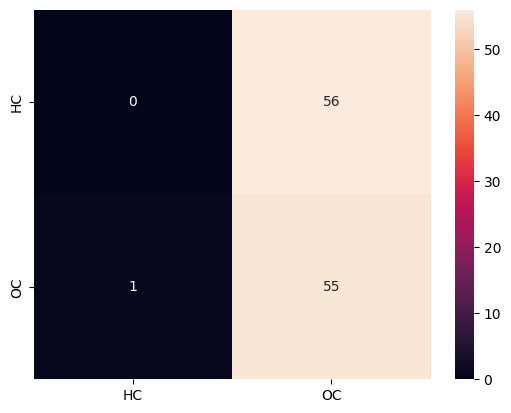

0.49107142857142855
LDA_85
Epoch 1/1000
9/9 [==============================] - 8s 145ms/step - loss: 0.7758 - accuracy: 0.0000e+00 - val_loss: 0.6949 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.7375 - accuracy: 0.0000e+00 - val_loss: 0.6930 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.7534 - accuracy: 0.0000e+00 - val_loss: 0.6929 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.8075 - accuracy: 0.0000e+00 - val_loss: 0.6951 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 26ms/step - loss: 0.7524 - accuracy: 0.0000e+00 - val_loss: 0.6970 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.7593 - accuracy: 0.0000e+00 - val_loss: 0.6986 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.754

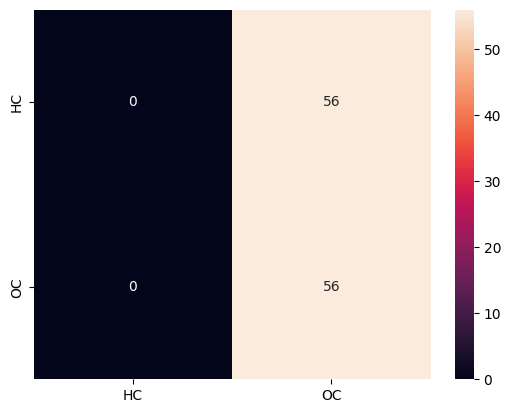

0.5
LDA_90
Epoch 1/1000
9/9 [==============================] - 7s 148ms/step - loss: 0.9164 - accuracy: 0.0000e+00 - val_loss: 0.6950 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 37ms/step - loss: 0.7984 - accuracy: 0.0000e+00 - val_loss: 0.7169 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 37ms/step - loss: 0.7800 - accuracy: 0.0000e+00 - val_loss: 0.7387 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 38ms/step - loss: 0.8941 - accuracy: 0.0000e+00 - val_loss: 0.7508 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 38ms/step - loss: 0.8628 - accuracy: 0.0000e+00 - val_loss: 0.7391 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 28ms/step - loss: 0.8219 - accuracy: 0.0000e+00 - val_loss: 0.7243 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 21ms/step - loss: 0.8465 - accuracy: 0.

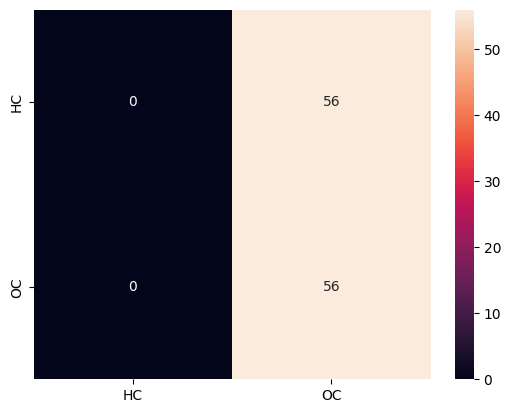

0.5
LDA_95
Epoch 1/1000
9/9 [==============================] - 7s 90ms/step - loss: 1.0802 - accuracy: 0.0000e+00 - val_loss: 0.9558 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 21ms/step - loss: 0.9497 - accuracy: 0.0000e+00 - val_loss: 0.8318 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 16ms/step - loss: 0.8750 - accuracy: 0.0000e+00 - val_loss: 0.7542 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 17ms/step - loss: 0.8153 - accuracy: 0.0000e+00 - val_loss: 0.7163 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 16ms/step - loss: 0.8012 - accuracy: 0.0000e+00 - val_loss: 0.6979 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.7744 - accuracy: 0.0000e+00 - val_loss: 0.6931 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 17ms/step - loss: 0.7889 - accuracy: 0.0

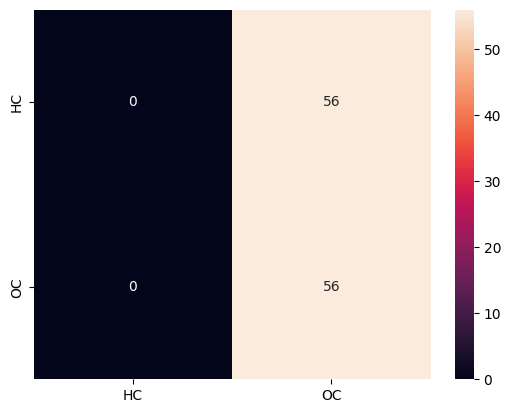

0.5
LDA_99
Epoch 1/1000
9/9 [==============================] - 8s 88ms/step - loss: 0.7582 - accuracy: 0.0000e+00 - val_loss: 0.7084 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.8171 - accuracy: 0.0000e+00 - val_loss: 0.7149 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.7987 - accuracy: 0.0000e+00 - val_loss: 0.7133 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.7544 - accuracy: 0.0000e+00 - val_loss: 0.7079 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.7496 - accuracy: 0.0000e+00 - val_loss: 0.7053 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.7898 - accuracy: 0.0000e+00 - val_loss: 0.7067 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.7089 - accuracy: 0.0

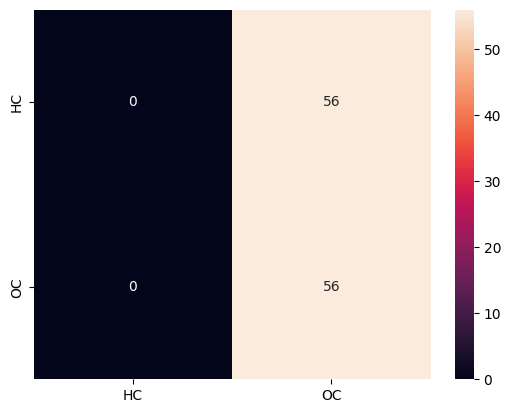

0.5
RF_80
Epoch 1/1000
9/9 [==============================] - 7s 169ms/step - loss: 0.8652 - accuracy: 0.0000e+00 - val_loss: 0.7756 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 44ms/step - loss: 0.9014 - accuracy: 0.0000e+00 - val_loss: 0.7273 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.7915 - accuracy: 0.0000e+00 - val_loss: 0.7073 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 25ms/step - loss: 0.7944 - accuracy: 0.0000e+00 - val_loss: 0.6952 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 29ms/step - loss: 0.8073 - accuracy: 0.0000e+00 - val_loss: 0.6924 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 28ms/step - loss: 0.7948 - accuracy: 0.0000e+00 - val_loss: 0.6916 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 25ms/step - loss: 0.7836 - accuracy: 0.0

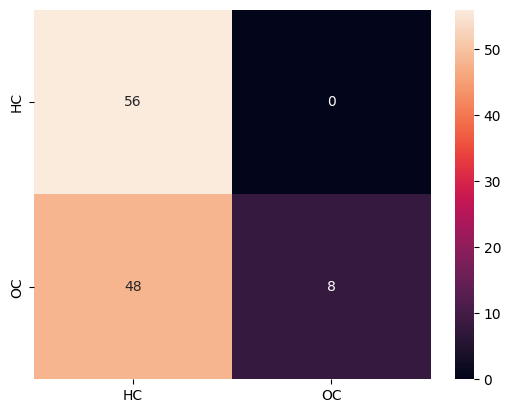

0.5714285714285714
RF_85
Epoch 1/1000
9/9 [==============================] - 6s 126ms/step - loss: 0.7708 - accuracy: 0.0000e+00 - val_loss: 0.6990 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 40ms/step - loss: 0.8147 - accuracy: 0.0000e+00 - val_loss: 0.6951 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 38ms/step - loss: 0.7531 - accuracy: 0.0000e+00 - val_loss: 0.6952 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 40ms/step - loss: 0.7908 - accuracy: 0.0000e+00 - val_loss: 0.6951 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 41ms/step - loss: 0.7607 - accuracy: 0.0000e+00 - val_loss: 0.6948 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 41ms/step - loss: 0.7824 - accuracy: 0.0000e+00 - val_loss: 0.6951 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 43ms/step - loss: 0.7792 

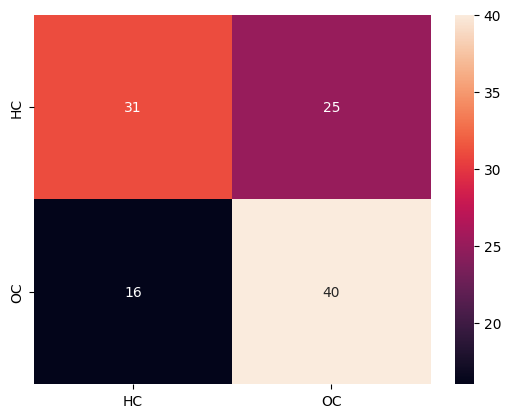

0.6339285714285714
RF_90
Epoch 1/1000
9/9 [==============================] - 7s 142ms/step - loss: 1.2235 - accuracy: 0.0000e+00 - val_loss: 1.2765 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 37ms/step - loss: 1.1007 - accuracy: 0.0000e+00 - val_loss: 1.1360 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 42ms/step - loss: 1.0146 - accuracy: 0.0000e+00 - val_loss: 1.0109 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 36ms/step - loss: 0.9774 - accuracy: 0.0000e+00 - val_loss: 0.9082 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.8654 - accuracy: 0.0000e+00 - val_loss: 0.8255 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 18ms/step - loss: 0.8144 - accuracy: 0.0000e+00 - val_loss: 0.7652 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 18ms/step - loss: 0.7704 

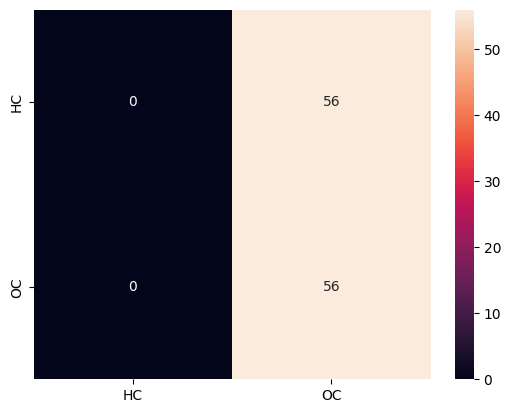

0.5
RF_95
Epoch 1/1000
9/9 [==============================] - 7s 133ms/step - loss: 0.8215 - accuracy: 0.0000e+00 - val_loss: 0.7141 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 27ms/step - loss: 0.7902 - accuracy: 0.0000e+00 - val_loss: 0.7108 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 31ms/step - loss: 0.8019 - accuracy: 0.0000e+00 - val_loss: 0.7155 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 37ms/step - loss: 0.7972 - accuracy: 0.0000e+00 - val_loss: 0.7195 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 31ms/step - loss: 0.7665 - accuracy: 0.0000e+00 - val_loss: 0.7218 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 26ms/step - loss: 0.7614 - accuracy: 0.0000e+00 - val_loss: 0.7197 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.7165 - accuracy: 0.0

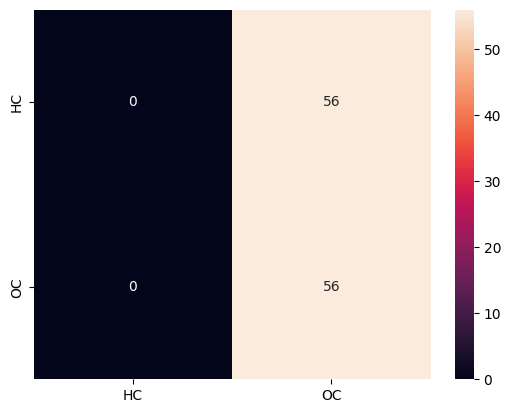

0.5
RF_99
Epoch 1/1000
9/9 [==============================] - 6s 122ms/step - loss: 1.3027 - accuracy: 0.0000e+00 - val_loss: 1.2744 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 17ms/step - loss: 1.1240 - accuracy: 0.0000e+00 - val_loss: 1.0023 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 16ms/step - loss: 1.0003 - accuracy: 0.0000e+00 - val_loss: 0.8124 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 17ms/step - loss: 0.8508 - accuracy: 0.0000e+00 - val_loss: 0.7209 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.8913 - accuracy: 0.0000e+00 - val_loss: 0.6990 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.7260 - accuracy: 0.0000e+00 - val_loss: 0.7008 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.8334 - accuracy: 0.0

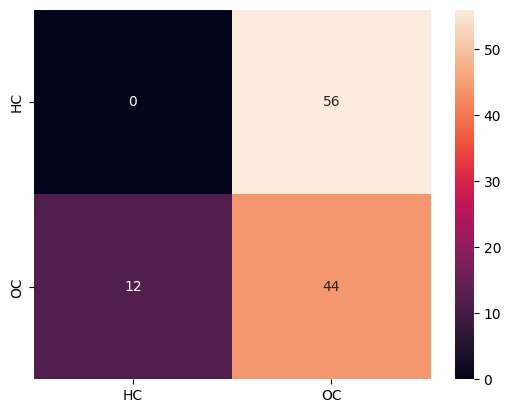

0.39285714285714285
Transformer_80
Epoch 1/1000
9/9 [==============================] - 6s 104ms/step - loss: 0.8444 - accuracy: 0.0000e+00 - val_loss: 0.7880 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 32ms/step - loss: 0.7821 - accuracy: 0.0000e+00 - val_loss: 0.7400 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 29ms/step - loss: 0.8150 - accuracy: 0.0000e+00 - val_loss: 0.7083 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 29ms/step - loss: 0.7395 - accuracy: 0.0000e+00 - val_loss: 0.6954 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 29ms/step - loss: 0.7131 - accuracy: 0.0000e+00 - val_loss: 0.6931 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 29ms/step - loss: 0.7317 - accuracy: 0.0000e+00 - val_loss: 0.6948 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 27ms/step - los

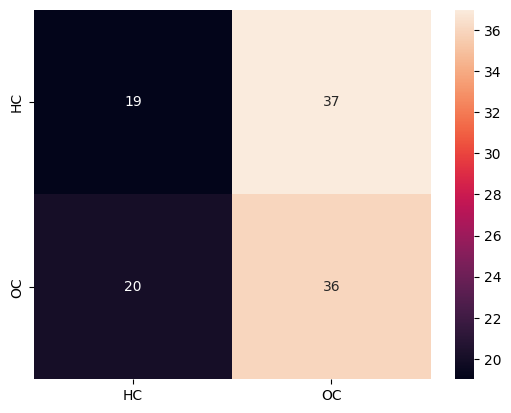

0.49107142857142855
Transformer_85
Epoch 1/1000
9/9 [==============================] - 6s 105ms/step - loss: 0.8445 - accuracy: 0.0000e+00 - val_loss: 0.8056 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.8276 - accuracy: 0.0000e+00 - val_loss: 0.7493 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 34ms/step - loss: 0.7959 - accuracy: 0.0000e+00 - val_loss: 0.7189 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 42ms/step - loss: 0.7731 - accuracy: 0.0000e+00 - val_loss: 0.7032 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 38ms/step - loss: 0.7657 - accuracy: 0.0000e+00 - val_loss: 0.6957 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 42ms/step - loss: 0.7596 - accuracy: 0.0000e+00 - val_loss: 0.6943 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 36ms/step - los

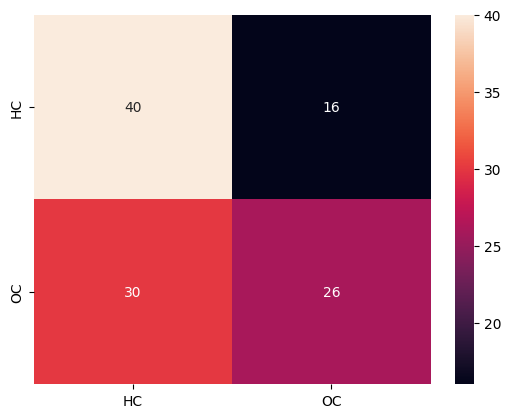

0.5892857142857143
Transformer_90
Epoch 1/1000
9/9 [==============================] - 6s 98ms/step - loss: 1.4787 - accuracy: 0.0000e+00 - val_loss: 1.6478 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 24ms/step - loss: 1.3751 - accuracy: 0.0000e+00 - val_loss: 1.3892 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 23ms/step - loss: 1.1870 - accuracy: 0.0000e+00 - val_loss: 1.1503 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 28ms/step - loss: 1.1040 - accuracy: 0.0000e+00 - val_loss: 0.9463 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.9554 - accuracy: 0.0000e+00 - val_loss: 0.8034 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 26ms/step - loss: 0.8202 - accuracy: 0.0000e+00 - val_loss: 0.7320 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 28ms/step - loss:

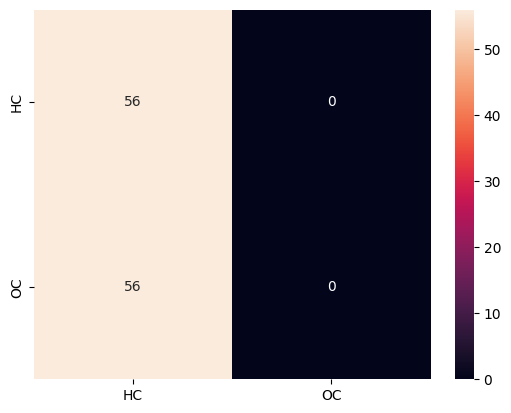

0.5
Transformer_95
Epoch 1/1000
9/9 [==============================] - 7s 91ms/step - loss: 0.7697 - accuracy: 0.0000e+00 - val_loss: 0.7217 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.7923 - accuracy: 0.0000e+00 - val_loss: 0.7119 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 18ms/step - loss: 0.8243 - accuracy: 0.0000e+00 - val_loss: 0.7062 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.8709 - accuracy: 0.0000e+00 - val_loss: 0.7064 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 21ms/step - loss: 0.7630 - accuracy: 0.0000e+00 - val_loss: 0.7081 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 19ms/step - loss: 0.7494 - accuracy: 0.0000e+00 - val_loss: 0.7081 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 19ms/step - loss: 0.8290 - accur

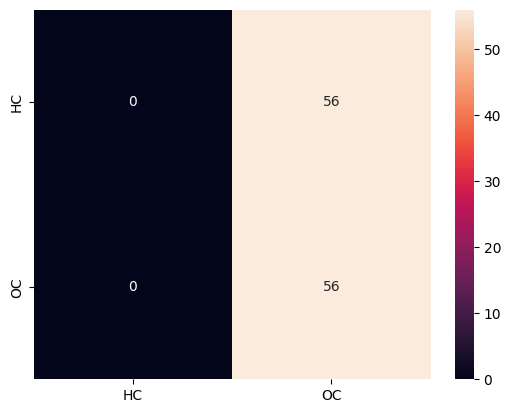

0.5
Transformer_99
Epoch 1/1000
9/9 [==============================] - 7s 87ms/step - loss: 1.4392 - accuracy: 0.0000e+00 - val_loss: 1.4507 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 11ms/step - loss: 1.2994 - accuracy: 0.0000e+00 - val_loss: 1.2776 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 12ms/step - loss: 1.1642 - accuracy: 0.0000e+00 - val_loss: 1.0860 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 13ms/step - loss: 1.0091 - accuracy: 0.0000e+00 - val_loss: 0.9001 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.9216 - accuracy: 0.0000e+00 - val_loss: 0.7559 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.8757 - accuracy: 0.0000e+00 - val_loss: 0.6950 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.7937 - accur

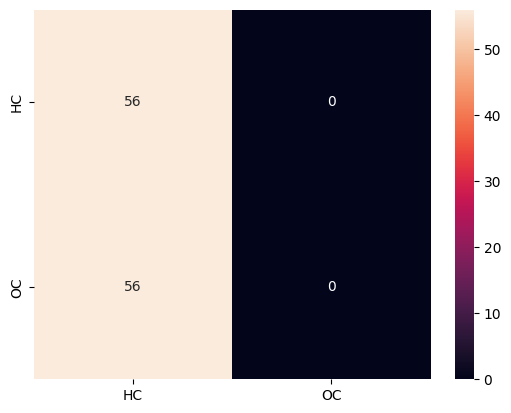

0.5
CNN_80
Epoch 1/1000
9/9 [==============================] - 7s 142ms/step - loss: 0.7714 - accuracy: 0.0000e+00 - val_loss: 0.7021 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 43ms/step - loss: 0.7572 - accuracy: 0.0000e+00 - val_loss: 0.6946 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 42ms/step - loss: 0.7694 - accuracy: 0.0000e+00 - val_loss: 0.6918 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 45ms/step - loss: 0.7484 - accuracy: 0.0000e+00 - val_loss: 0.6916 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 42ms/step - loss: 0.7577 - accuracy: 0.0000e+00 - val_loss: 0.6918 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 41ms/step - loss: 0.7646 - accuracy: 0.0000e+00 - val_loss: 0.6920 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 45ms/step - loss: 0.7096 - accuracy: 0.

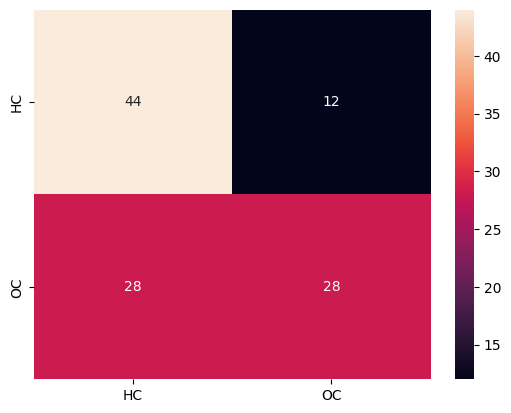

0.6428571428571429
CNN_85
Epoch 1/1000
9/9 [==============================] - 7s 120ms/step - loss: 1.1608 - accuracy: 0.0000e+00 - val_loss: 1.1002 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 26ms/step - loss: 0.9727 - accuracy: 0.0000e+00 - val_loss: 0.8967 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 26ms/step - loss: 0.8867 - accuracy: 0.0000e+00 - val_loss: 0.7735 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 26ms/step - loss: 0.8708 - accuracy: 0.0000e+00 - val_loss: 0.7186 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.8731 - accuracy: 0.0000e+00 - val_loss: 0.7027 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.8249 - accuracy: 0.0000e+00 - val_loss: 0.6980 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.8721

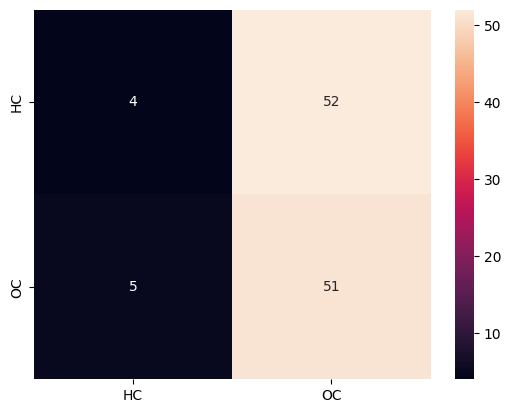

0.49107142857142855
CNN_90
Epoch 1/1000
9/9 [==============================] - 7s 147ms/step - loss: 0.7900 - accuracy: 0.0000e+00 - val_loss: 0.7336 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 36ms/step - loss: 0.8485 - accuracy: 0.0000e+00 - val_loss: 0.7066 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 37ms/step - loss: 0.8033 - accuracy: 0.0000e+00 - val_loss: 0.6931 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 30ms/step - loss: 0.7619 - accuracy: 0.0000e+00 - val_loss: 0.6931 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 27ms/step - loss: 0.7869 - accuracy: 0.0000e+00 - val_loss: 0.6968 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.7283 - accuracy: 0.0000e+00 - val_loss: 0.6978 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 25ms/step - loss: 0.771

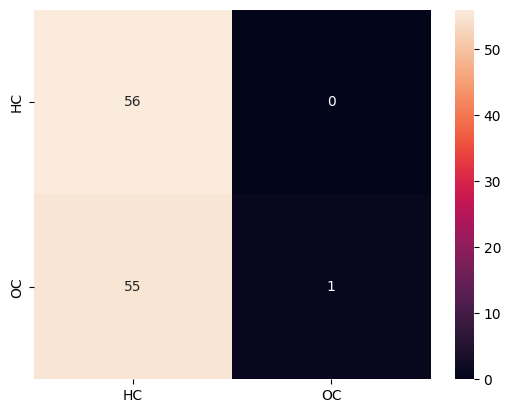

0.5089285714285714
CNN_95
Epoch 1/1000
9/9 [==============================] - 7s 90ms/step - loss: 0.9194 - accuracy: 0.0000e+00 - val_loss: 0.7032 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 18ms/step - loss: 0.8901 - accuracy: 0.0000e+00 - val_loss: 0.6947 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 17ms/step - loss: 0.8705 - accuracy: 0.0000e+00 - val_loss: 0.6946 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 17ms/step - loss: 0.9028 - accuracy: 0.0000e+00 - val_loss: 0.6950 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.8087 - accuracy: 0.0000e+00 - val_loss: 0.6976 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 20ms/step - loss: 0.8900 - accuracy: 0.0000e+00 - val_loss: 0.7000 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 19ms/step - loss: 0.7967 

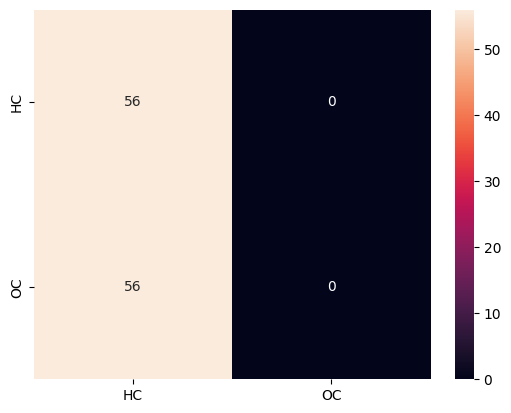

0.5
CNN_99
Epoch 1/1000
9/9 [==============================] - 8s 90ms/step - loss: 1.0951 - accuracy: 0.0000e+00 - val_loss: 1.0096 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 13ms/step - loss: 0.9256 - accuracy: 0.0000e+00 - val_loss: 0.8860 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.8761 - accuracy: 0.0000e+00 - val_loss: 0.7947 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.7898 - accuracy: 0.0000e+00 - val_loss: 0.7321 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.7983 - accuracy: 0.0000e+00 - val_loss: 0.7020 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.7500 - accuracy: 0.0000e+00 - val_loss: 0.6937 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.8124 - accuracy: 0.0

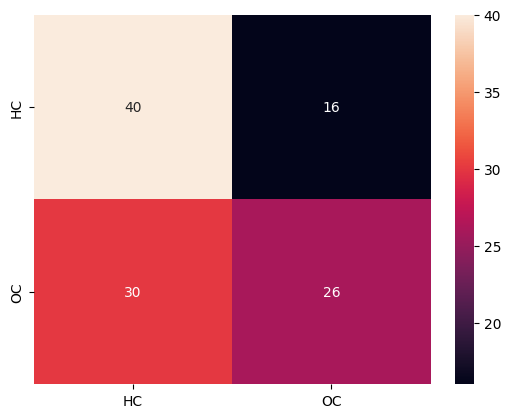

0.5892857142857143
{'LDA80': 0.49107142857142855, 'LDA85': 0.5, 'LDA90': 0.5, 'LDA95': 0.5, 'LDA99': 0.5, 'RF80': 0.5714285714285714, 'RF85': 0.6339285714285714, 'RF90': 0.5, 'RF95': 0.5, 'RF99': 0.39285714285714285, 'Transformer80': 0.49107142857142855, 'Transformer85': 0.5892857142857143, 'Transformer90': 0.5, 'Transformer95': 0.5, 'Transformer99': 0.5, 'CNN80': 0.6428571428571429, 'CNN85': 0.49107142857142855, 'CNN90': 0.5089285714285714, 'CNN95': 0.5, 'CNN99': 0.5892857142857143}


In [ ]:
strictness = [80, 85, 90, 95, 99]
model = ['LDA', 'RF', 'Transformer', 'CNN']
fin_dt = {}

for mod in model:
  for number in strictness:
    train_name = 'Training_' + mod + '_' + str(number) + '.csv'
    test_name = 'Testing_' + mod + '_' + str(number) + '.csv'
    train_load = '/content/drive/MyDrive/Ovarian_Cancer/' + train_name
    test_load = '/content/drive/MyDrive/Ovarian_Cancer/' + test_name
    train_df = pd.read_csv(train_load, index_col = 0)
    test_df = pd.read_csv(test_load, index_col = 0)

    X_train_ = train_df.drop('y', axis = 1)
    y_train_ = train_df['y']

    X_test_ = test_df.drop('y', axis = 1)
    y_test_ = test_df['y']

    le = preprocessing.LabelEncoder()
    y_train_ = le.fit_transform(y_train_)
    y_test_ = le.transform(y_test_)


    y_train_ = one_hot_encoding(y_train_, 2)
    y_test_ = one_hot_encoding(y_test_, 2)

    X_train = np.array(X_train_)
    X_train_3D = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

    X_test = np.array(X_test_)
    X_test_3D = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

    f = Trans(X_train_3D, y_train_, X_test_3D, y_test_, train_name[9:-4])

    n = mod + str(number)
    fin_dt[n] = f
    print(f)

print(fin_dt)

In [ ]:
fin_dt

{'LDA80': 0.49107142857142855,
 'LDA85': 0.5,
 'LDA90': 0.5,
 'LDA95': 0.5,
 'LDA99': 0.5,
 'RF80': 0.5714285714285714,
 'RF85': 0.6339285714285714,
 'RF90': 0.5,
 'RF95': 0.5,
 'RF99': 0.39285714285714285,
 'Transformer80': 0.49107142857142855,
 'Transformer85': 0.5892857142857143,
 'Transformer90': 0.5,
 'Transformer95': 0.5,
 'Transformer99': 0.5,
 'CNN80': 0.6428571428571429,
 'CNN85': 0.49107142857142855,
 'CNN90': 0.5089285714285714,
 'CNN95': 0.5,
 'CNN99': 0.5892857142857143}

##Random Forest

In [ ]:
def RandFor(X_train, y_train, X_test, y_test, name):
  print(name)
  name = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced_subsample')

  name.fit(X_train, y_train)
  pred = name.predict(X_test)
  final_accuracy = accuracy_score(y_test, pred)

  print(str(name))
  print(final_accuracy)

  confusion_matrix = sklearn.metrics.confusion_matrix(y_test, pred)
  acc = accuracy_score(y_test, pred)
  print('validation_accuracy: %.3f' % (acc))

  DetaFrame_cm = pd.DataFrame(confusion_matrix, range(2), range(2))
  snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['HC', 'OC'], xticklabels=['HC', 'OC'])
  plt.show()

  return(accuracy_score(y_test, pred))

LDA_80
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.6428571428571429
validation_accuracy: 0.643


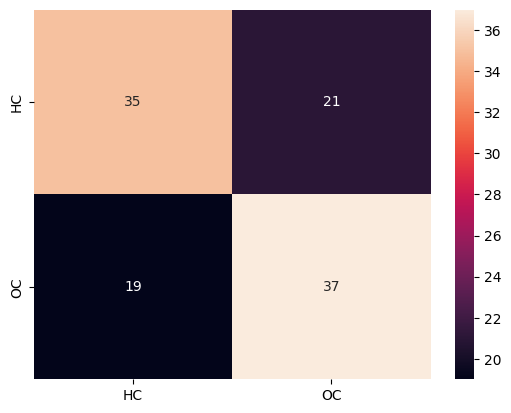

LDA_85
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.6160714285714286
validation_accuracy: 0.616


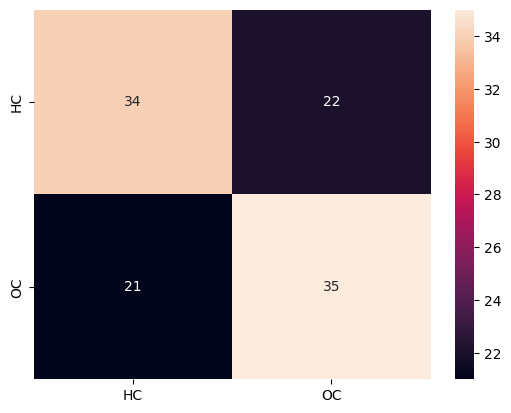

LDA_90
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.6428571428571429
validation_accuracy: 0.643


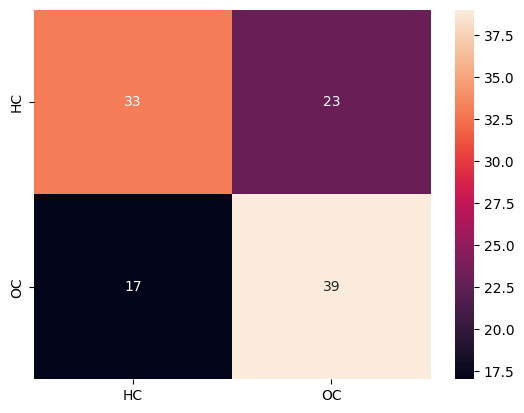

LDA_95
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.7589285714285714
validation_accuracy: 0.759


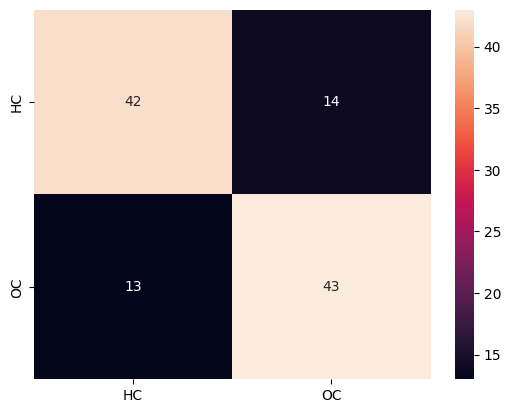

LDA_99
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.5982142857142857
validation_accuracy: 0.598


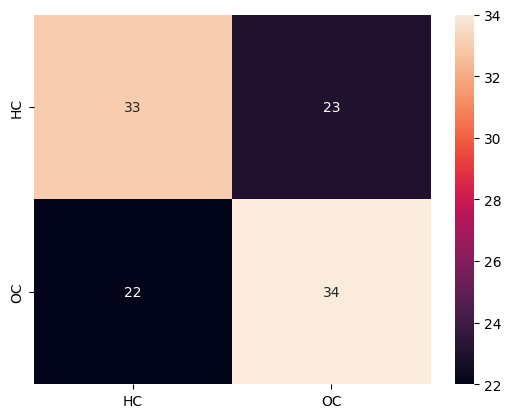

RF_80
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.625
validation_accuracy: 0.625


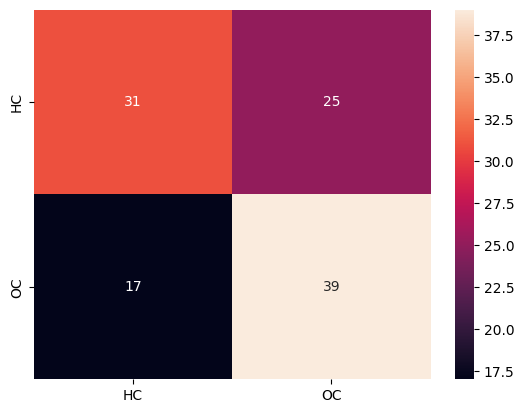

RF_85
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.6785714285714286
validation_accuracy: 0.679


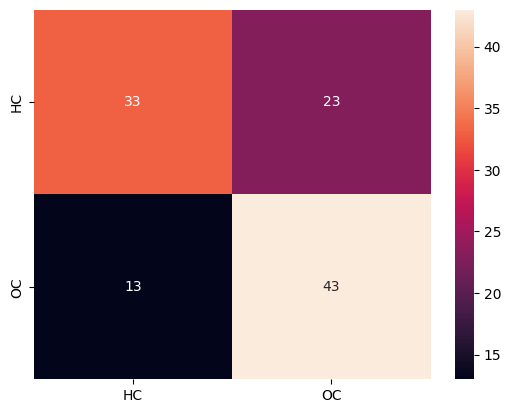

RF_90
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.6517857142857143
validation_accuracy: 0.652


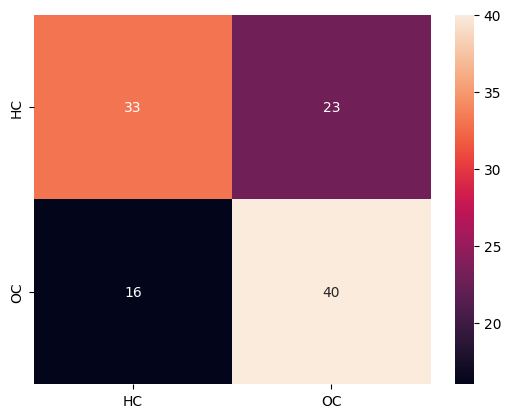

RF_95
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.6160714285714286
validation_accuracy: 0.616


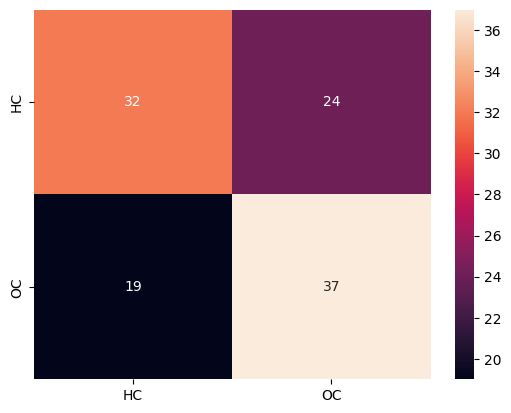

RF_99
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.5714285714285714
validation_accuracy: 0.571


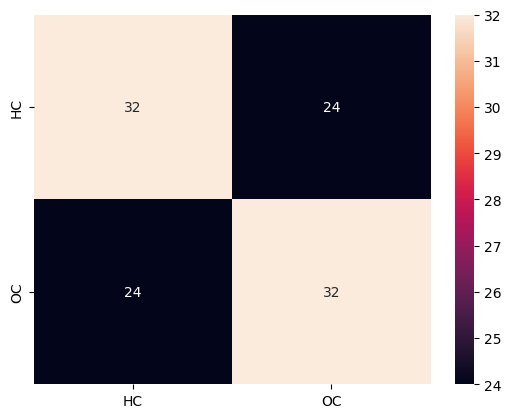

CNN_80
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.8214285714285714
validation_accuracy: 0.821


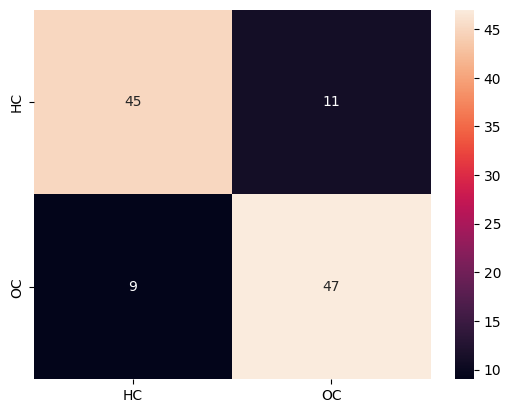

CNN_85
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.8303571428571429
validation_accuracy: 0.830


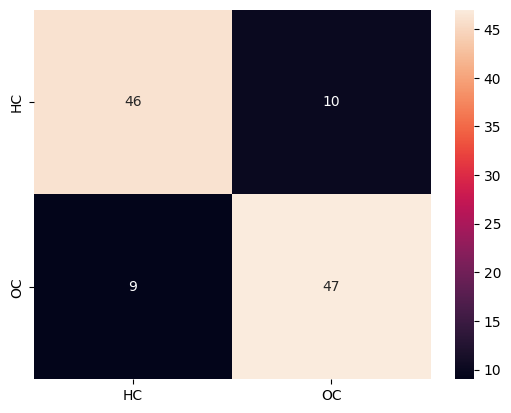

CNN_90
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.8571428571428571
validation_accuracy: 0.857


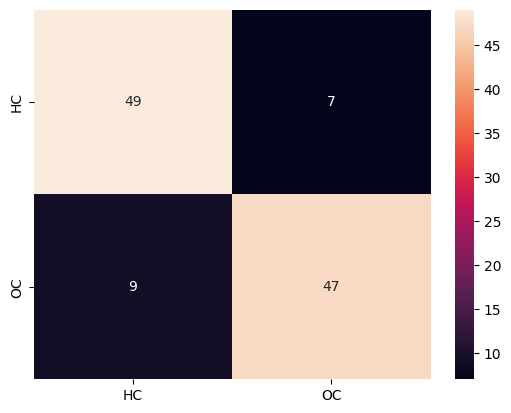

CNN_95
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.75
validation_accuracy: 0.750


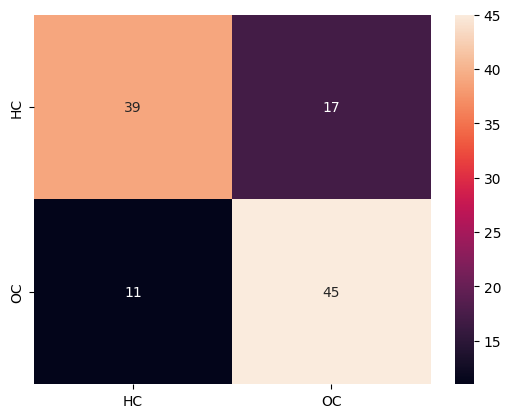

CNN_99
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.6339285714285714
validation_accuracy: 0.634


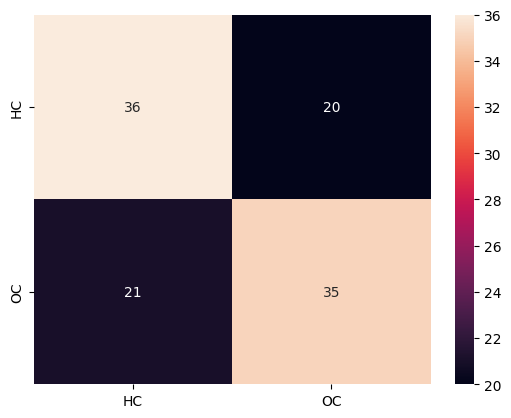

Transformer_80
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.7857142857142857
validation_accuracy: 0.786


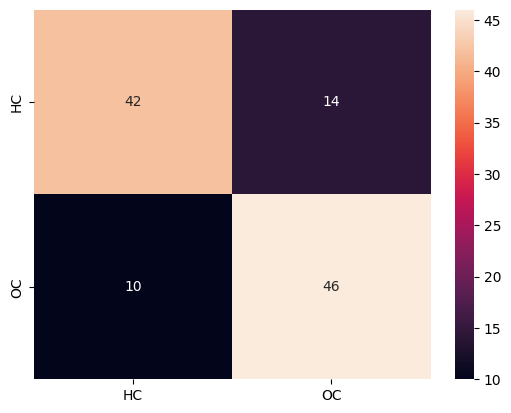

Transformer_85
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.625
validation_accuracy: 0.625


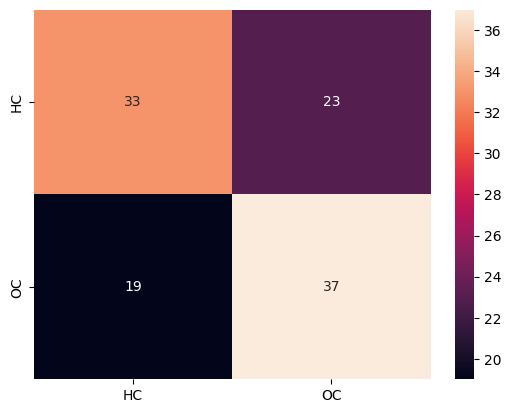

Transformer_90
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.5446428571428571
validation_accuracy: 0.545


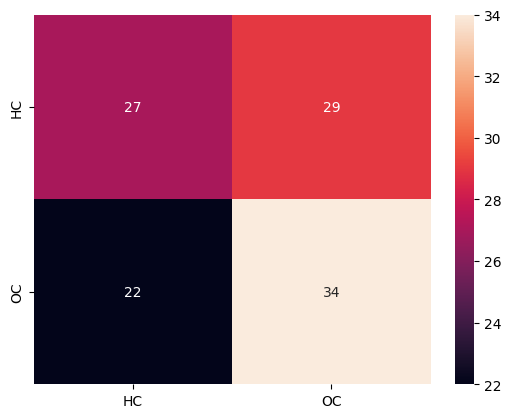

Transformer_95
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.625
validation_accuracy: 0.625


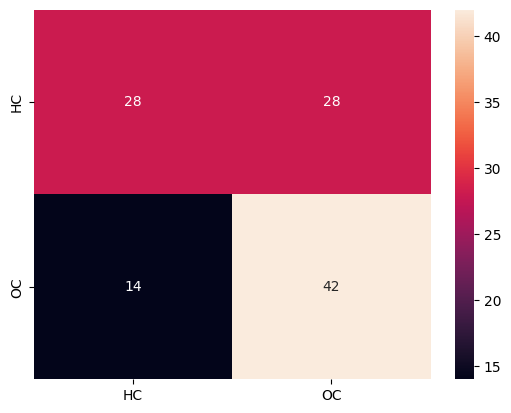

Transformer_99
RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       random_state=0)
0.5089285714285714
validation_accuracy: 0.509


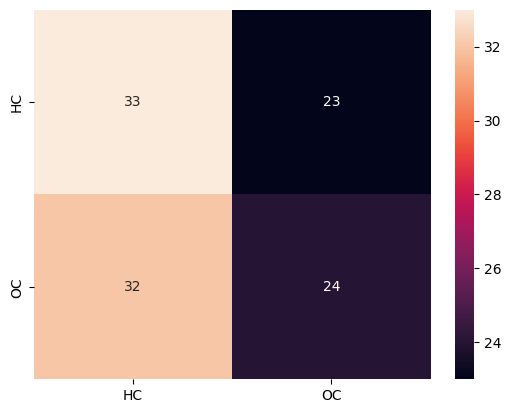

{'LDA80': 0.6428571428571429, 'LDA85': 0.6160714285714286, 'LDA90': 0.6428571428571429, 'LDA95': 0.7589285714285714, 'LDA99': 0.5982142857142857, 'RF80': 0.625, 'RF85': 0.6785714285714286, 'RF90': 0.6517857142857143, 'RF95': 0.6160714285714286, 'RF99': 0.5714285714285714, 'CNN80': 0.8214285714285714, 'CNN85': 0.8303571428571429, 'CNN90': 0.8571428571428571, 'CNN95': 0.75, 'CNN99': 0.6339285714285714, 'Transformer80': 0.7857142857142857, 'Transformer85': 0.625, 'Transformer90': 0.5446428571428571, 'Transformer95': 0.625, 'Transformer99': 0.5089285714285714}


In [ ]:
strictness = [80, 85, 90, 95, 99]
model = ['LDA', 'RF', 'CNN', 'Transformer']
fin_rf = {}

for mod in model:
  for number in strictness:
    train_name = 'Training_' + mod + '_' + str(number) + '.csv'
    test_name = 'Testing_' + mod + '_' + str(number) + '.csv'
    train_load = '/content/drive/MyDrive/Ovarian_Cancer/' + train_name
    test_load = '/content/drive/MyDrive/Ovarian_Cancer/' + test_name
    train_df = pd.read_csv(train_load, index_col = 0)
    test_df = pd.read_csv(test_load, index_col = 0)

    X_train_ = train_df.drop('y', axis = 1)
    y_train_ = train_df['y']

    X_test_ = test_df.drop('y', axis = 1)
    y_test_ = test_df['y']

    f = RandFor(X_train_, y_train_, X_test_, y_test_, train_name[9:-4])
    i = mod + str(number)
    fin_rf[i] = f

print(fin_rf)

In [ ]:
fin_rf

{'LDA80': 0.6428571428571429,
 'LDA85': 0.6160714285714286,
 'LDA90': 0.6428571428571429,
 'LDA95': 0.7589285714285714,
 'LDA99': 0.5982142857142857,
 'RF80': 0.625,
 'RF85': 0.6785714285714286,
 'RF90': 0.6517857142857143,
 'RF95': 0.6160714285714286,
 'RF99': 0.5714285714285714,
 'CNN80': 0.8214285714285714,
 'CNN85': 0.8303571428571429,
 'CNN90': 0.8571428571428571,
 'CNN95': 0.75,
 'CNN99': 0.6339285714285714,
 'Transformer80': 0.7857142857142857,
 'Transformer85': 0.625,
 'Transformer90': 0.5446428571428571,
 'Transformer95': 0.625,
 'Transformer99': 0.5089285714285714}

##LDA

In [ ]:
def LDA(X_train, y_train, X_test, y_test, name):
  print(name)

  name = LinearDiscriminantAnalysis(
    solver='lsqr',
    shrinkage = 'auto',
    priors = None,
    n_components = None,
    store_covariance = False,
    tol = 0.001,
    covariance_estimator = None)

  name.fit(X_train, y_train)
  pred = name.predict(X_test)
  final_accuracy = accuracy_score(y_test, pred)

  print(str(name))
  print(final_accuracy)

  confusion_matrix = sklearn.metrics.confusion_matrix(y_test, pred)
  acc = accuracy_score(y_test, pred)
  print('validation_accuracy: %.3f' % (acc))

  DetaFrame_cm = pd.DataFrame(confusion_matrix, range(2), range(2))
  snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['HC', 'OC'], xticklabels=['HC', 'OC'])
  plt.show()

  return(accuracy_score(y_test, pred))

LDA_80
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.7232142857142857
validation_accuracy: 0.723


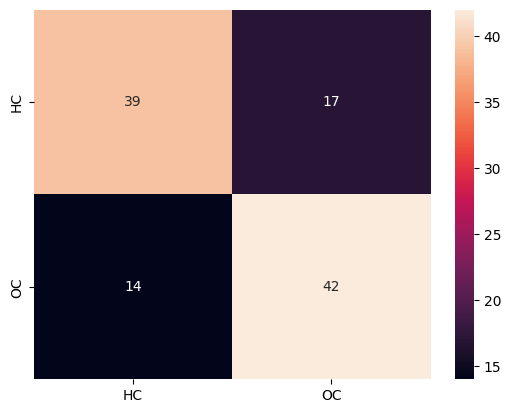

LDA_85
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.7053571428571429
validation_accuracy: 0.705


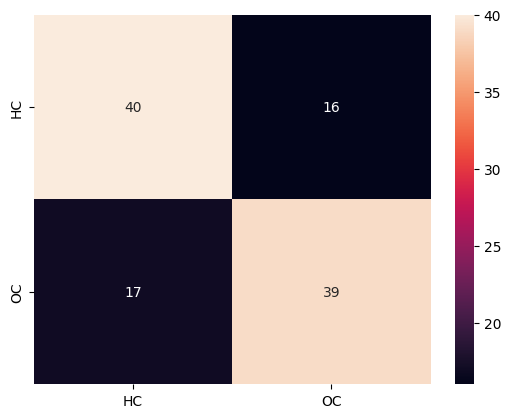

LDA_90
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.6875
validation_accuracy: 0.688


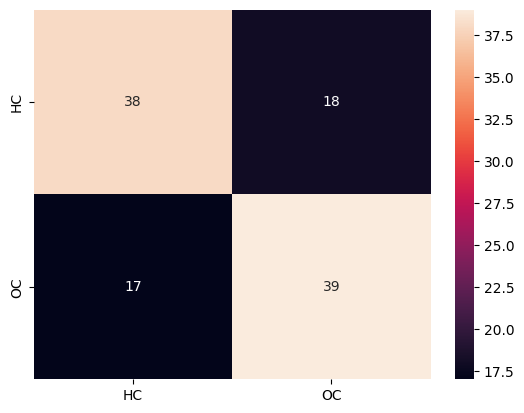

LDA_95
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.7053571428571429
validation_accuracy: 0.705


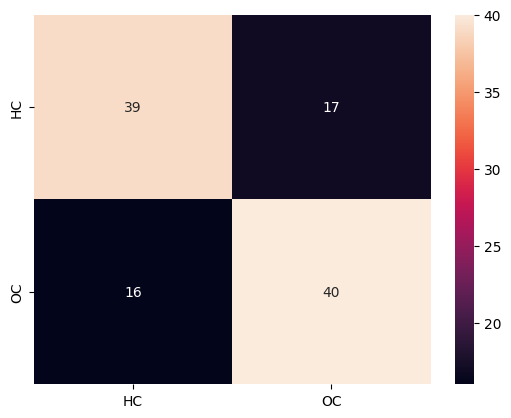

LDA_99
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.6696428571428571
validation_accuracy: 0.670


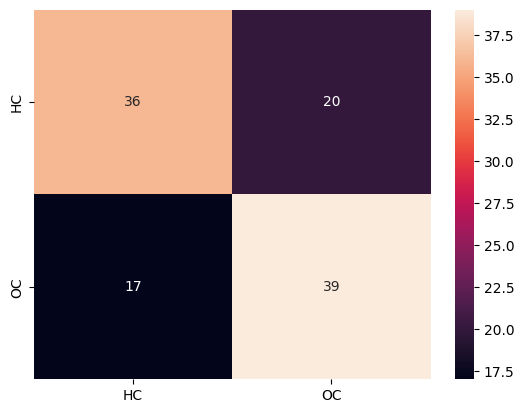

RF_80
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.7321428571428571
validation_accuracy: 0.732


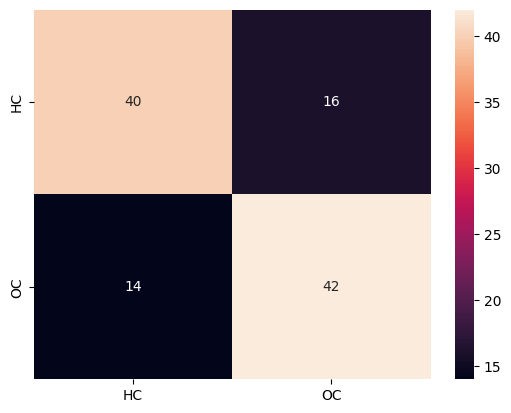

RF_85
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.7410714285714286
validation_accuracy: 0.741


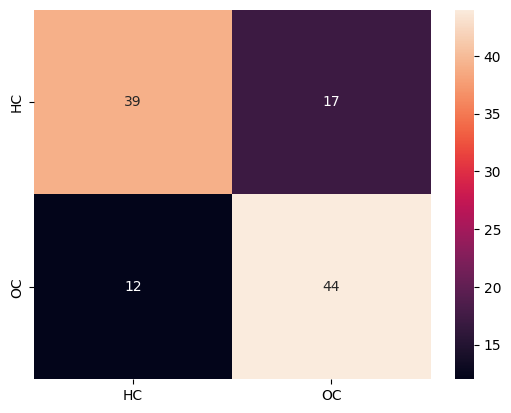

RF_90
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.6875
validation_accuracy: 0.688


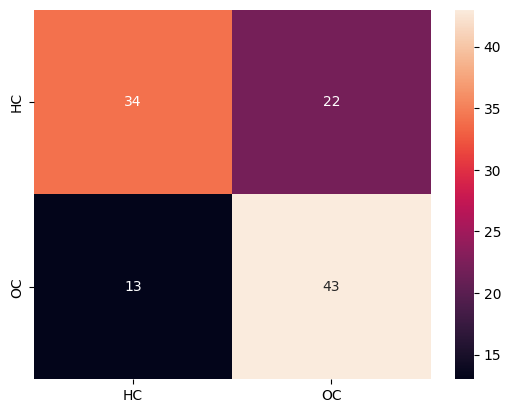

RF_95
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.6607142857142857
validation_accuracy: 0.661


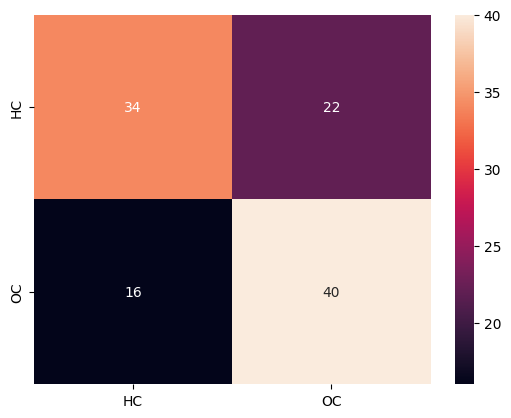

RF_99
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.6071428571428571
validation_accuracy: 0.607


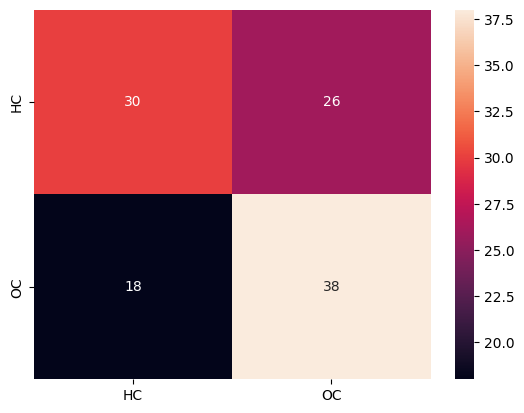

Transformer_80
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.7142857142857143
validation_accuracy: 0.714


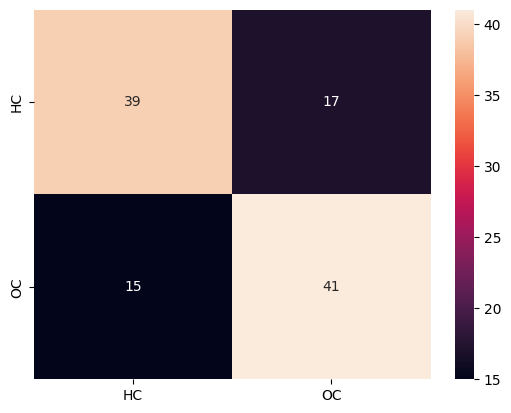

Transformer_85
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.7321428571428571
validation_accuracy: 0.732


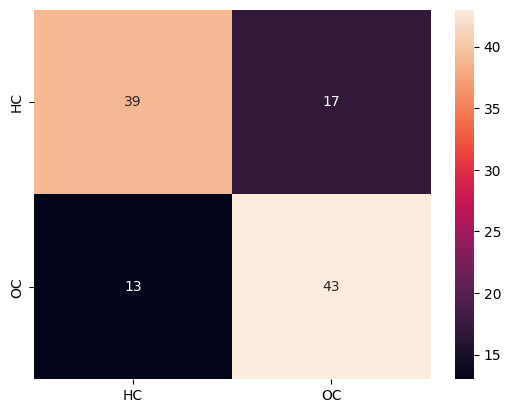

Transformer_90
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.7053571428571429
validation_accuracy: 0.705


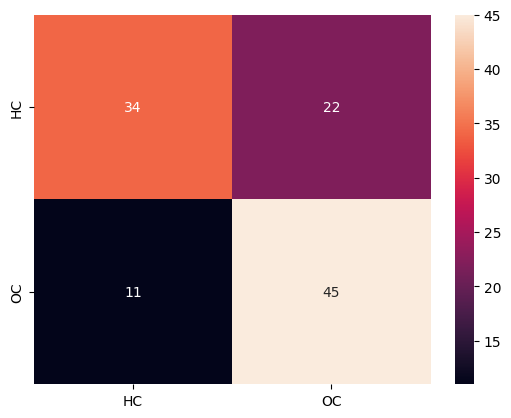

Transformer_95
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.6964285714285714
validation_accuracy: 0.696


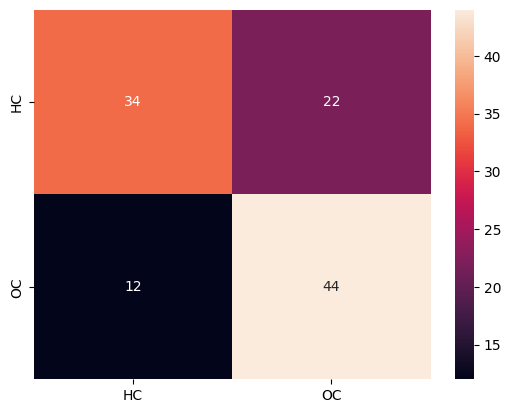

Transformer_99
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.5089285714285714
validation_accuracy: 0.509


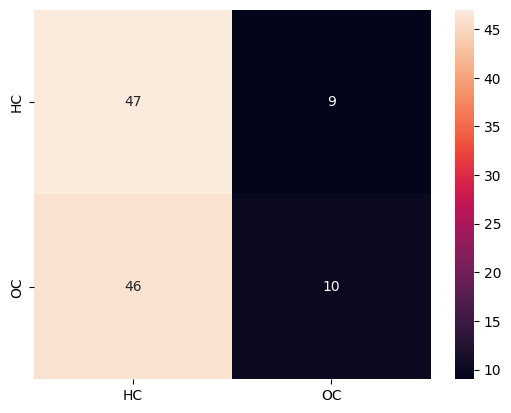

CNN_80
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.7857142857142857
validation_accuracy: 0.786


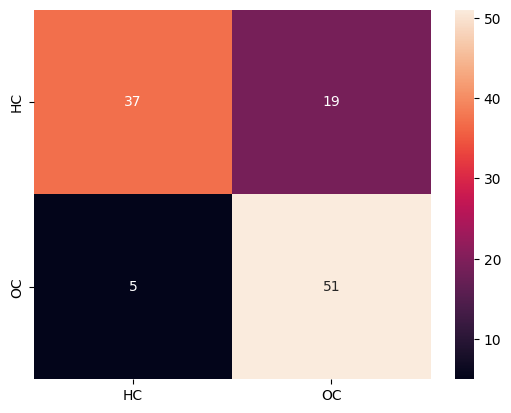

CNN_85
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.7678571428571429
validation_accuracy: 0.768


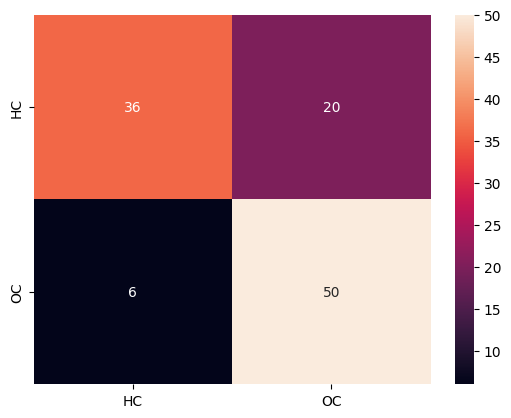

CNN_90
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.75
validation_accuracy: 0.750


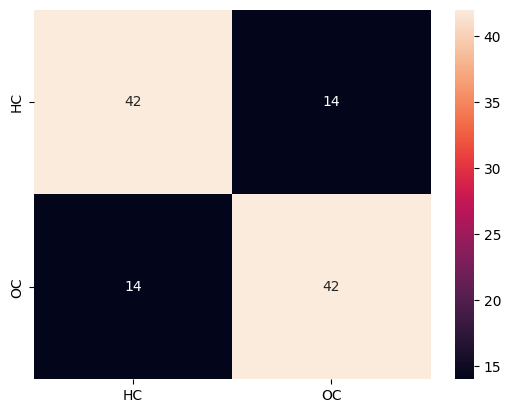

CNN_95
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.7589285714285714
validation_accuracy: 0.759


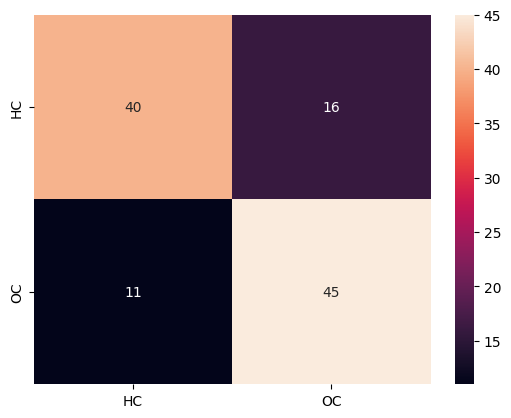

CNN_99
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)
0.6160714285714286
validation_accuracy: 0.616


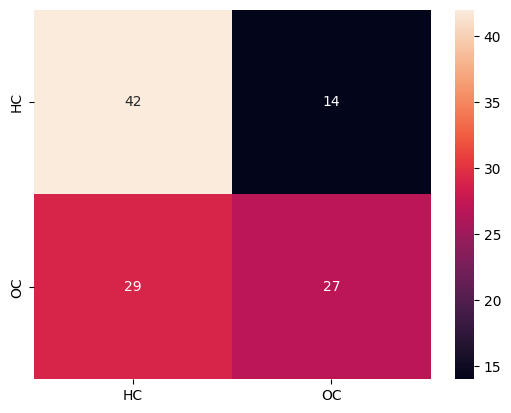

{'LDA80': 0.7232142857142857, 'LDA85': 0.7053571428571429, 'LDA90': 0.6875, 'LDA95': 0.7053571428571429, 'LDA99': 0.6696428571428571, 'RF80': 0.7321428571428571, 'RF85': 0.7410714285714286, 'RF90': 0.6875, 'RF95': 0.6607142857142857, 'RF99': 0.6071428571428571, 'Transformer80': 0.7142857142857143, 'Transformer85': 0.7321428571428571, 'Transformer90': 0.7053571428571429, 'Transformer95': 0.6964285714285714, 'Transformer99': 0.5089285714285714, 'CNN80': 0.7857142857142857, 'CNN85': 0.7678571428571429, 'CNN90': 0.75, 'CNN95': 0.7589285714285714, 'CNN99': 0.6160714285714286}


In [ ]:
strictness = [80, 85, 90, 95, 99]
model = ['LDA', 'RF', 'Transformer', 'CNN']
fin_lda = {}

for mod in model:
  for number in strictness:
    train_name = 'Training_' + mod + '_' + str(number) + '.csv'
    test_name = 'Testing_' + mod + '_' + str(number) + '.csv'
    train_load = '/content/drive/MyDrive/Ovarian_Cancer/' + train_name
    test_load = '/content/drive/MyDrive/Ovarian_Cancer/' + test_name
    train_df = pd.read_csv(train_load, index_col = 0)
    test_df = pd.read_csv(test_load, index_col = 0)

    X_train_ = train_df.drop('y', axis = 1)
    y_train_ = train_df['y']

    X_test_ = test_df.drop('y', axis = 1)
    y_test_ = test_df['y']

    f = LDA(X_train_, y_train_, X_test_, y_test_, train_name[9:-4])
    i = mod + str(number)
    fin_lda[i] = f

print(fin_lda)

In [ ]:
fin_lda

{'LDA80': 0.7232142857142857,
 'LDA85': 0.7053571428571429,
 'LDA90': 0.6875,
 'LDA95': 0.7053571428571429,
 'LDA99': 0.6696428571428571,
 'RF80': 0.7321428571428571,
 'RF85': 0.7410714285714286,
 'RF90': 0.6875,
 'RF95': 0.6607142857142857,
 'RF99': 0.6071428571428571,
 'Transformer80': 0.7142857142857143,
 'Transformer85': 0.7321428571428571,
 'Transformer90': 0.7053571428571429,
 'Transformer95': 0.6964285714285714,
 'Transformer99': 0.5089285714285714,
 'CNN80': 0.7857142857142857,
 'CNN85': 0.7678571428571429,
 'CNN90': 0.75,
 'CNN95': 0.7589285714285714,
 'CNN99': 0.6160714285714286}